<h1><center>Big Data Challenge - Team E</center></h1>

#### __How have people’s habits changed during the pandemic and what is the impact on UK Sustainability targets as a result of these changes?__

By Sarah Butterworth, Maisha Chowdhury, Sophie Kitchin, Skye Hinds, Sian Gregory

## Introduction

To mitigate the health impacts of COVID-19, the UK government is continuously adapting its response and stringency measures. The measures began on 16th March 2020 with an announcement that all unnecessary contact should cease, leading to a national lockdown on 23rd March, which included the closing of non-essential businesses and schools. As the UK population adapts to this new way of life centred around the home, new habits and perceptions may form. In this report we investigate examples of how habits have changed and how this affects the UK's Sustainability targets.

The investigation is split into two parts:

1. __Individual habits: Transportation habits and the UK's Sustainability targets.__
2. __Aggregate habits: The overall impact of the COVID-19 pandemic on businesses and how their sustainability interacted with this.__

A change in transportation habits may directly impact the UK’s 25-year environmental plan, particularly the clean air target. With a shift to working from home, a reduction in traffic may also lead to a reduction in air pollution, particularly in usually congested city areas.

We define people’s habits to go beyond that of the general population, but to also include the habits of investors and businesses. Markets across the world have been severely impacted by the pandemic, which may lead to a shift in priorities and a reduction in environmental and social investment by businesses.

To meet the environmental targets, the government must work with businesses operating in the UK to ensure best sustainable practices. During these unprecedented times, businesses must be assured that good environmental, social and governance is worth pursuing, despite the economic impact of COVID-19.

## Acknowledgment 

We would like to express special thanks to R2 Data Labs and Emergent Alliance with particular thanks to Manisha Mistry, Caroline Gorski, Alvaro Corrales Cano, Maria Ivanciu and Olya Nicholls as well as the Code First Girls team who gave us this opportunity to participate in this incredible open source project, on the topic of sustainability in a post Covid-19 world. This project helped us to improve our Python and research skills which is crucial for data science. We came to learn new things from our research and results. We really enjoyed working together, it made coding and analysis more fun and engaging. We hope to present out work to you to further tell the story of our data. We hope we delivered on your expectations and thank you once again for this special opportunity.  


### Contents
1. Environmental Sustainability Results

   a) Air Quality in UK Major Cities during the COVID-19 Lockdown Period

   b) Transport Habits During the COVID-19 Pandemic
2. Economic and ESG results

   a) Economic Impact of COVID-19 on Companies by Sector

   b) The Rise of ESG Firms

   c) ESG Resiliance & The Impact of ESG Ratings on Tech Companies During the Pandemic 

Each section outlines the data used, the preparation and exploration of the data, and the results. 

## 1) Individual habits: Transportation habits and the clean air sustainability target

The UK's lockdown period restricted movement and interaction of the population, ultimately impacting people's habits, such as consumer habits and transportation usage. The impact of these changes on the UK's sustainability targets is largely unknown, and will likely depend on the continuation of high stringency levels. 

In this section we will focus on the UK's clean air sustainability target and investigate how changes in transportation habits during the pandemic may affect this.

---

### 1. a) Air Quality in UK Major Cities during the COVID-19 Lockdown Period 

#### __Introduction__

One of the UK's sustainability targets is to reduce 5 major air pollutants by 2030, in order to halve the effects on public health. One of the 5 major air pollutants, nitrogen dioxide, is mainly produced from vehicles and the burning of fossil fuels and is well measured across the UK's Automatic Urban and Rural Network (AURN)(Air Expert Quality Group, 2004). 

The aim of this work is to identify the impact of COVID-19 stringency levels on transportation usage in the UK and consequently nitrogen oxide concentrations in major cities. 

In [ ]:
#Import libraries and make sure matplotlib is inline with notebook

%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import os
import geopandas as gp

#### __Description of the data__

The main dataset used for this section are the Air Quality Datasets from DEFRA and AURN. Major cities across the UK have been selected as they are predicted to be the most impacted by the change in traffic. 

The stringency dataset from Oxford University is also selected to identify any correlation with changes in nitrogen dioxide (NO2) and more stringent measures.

#### __References__:

Department for Environment, Food and Rural Affairs (2020). UK AIR: Air Information Resource. Available at: https://uk-air.defra.gov.uk/ (Accessed: 5 September 2020).

Hale, T., Webster, S. Petherick, A., Phillips, T., and Kira, B. (2020). Oxford COVID-19 Government Response Tracker, Blavatnik School of Government. Data use policy: Creative Commons Attribution CC BY standard.



In [ ]:
# Import airqual data, from UK Air DEFRA (2020) https://uk-air.defra.gov.uk/data/ Accessed: 05/09/2020https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker
filename = 'airqual.csv'
airqualdf = pd.read_csv(filename)

In [ ]:
# Import stringency from provided dataset, Coronavirus Government Response Tracker, 
#Oxford University (2020) https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker, Accessed: 05/09/2020
filename2 = 'D:\Sarah\Documents\Hackathon\stringency3.csv'
strdf = pd.read_csv(filename2)

In [ ]:
#convert dates to datetime for better plotting
airqualdf['Date'] = pd.to_datetime(airqualdf['Date'])

In [ ]:
#convert dates to datetime for better plotting
strdf['Date']=pd.to_datetime(strdf['Date'])

#### __Preparing the Data__

The AURN dataset is previewed below, and the data was cleaned and organised using mySQL. As mySQL has been selected to clean and filter data, various versions/tables of the air quality dataset are imported when required. The raw data is freely available at: https://uk-air.defra.gov.uk/data/. 

As the author does not have a background in air quality preduction, NaN values were left in the dataset, as air pollutant levels are dependent on many variables (wind direction and strength, daily temperature, congestion levels).  

In [ ]:
#checking imported data. NOTE FOR READER: Measurements are in μgm-3 

airqualdf[50:100]

,Birmingham A4540 Roadside,Edinburgh St Leonards,Glasgow Kerbside,London Marylebone Road,Manchester Piccadilly,Newcastle Centre
Date,,,,,,
2017-09-20,76.0,25.0,279.0,444.0,64.0,57.0
2017-09-21,99.0,29.0,156.0,404.0,47.0,35.0
2017-09-22,122.0,24.0,259.0,496.0,83.0,55.0
2017-09-23,63.0,20.0,235.0,223.0,71.0,37.0
2017-09-24,42.0,30.0,236.0,171.0,55.0,25.0
2017-09-25,73.0,40.0,245.0,201.0,88.0,50.0
2017-09-26,61.0,28.0,261.0,215.0,88.0,50.0
2017-09-27,52.0,17.0,158.0,363.0,58.0,29.0
2017-09-28,118.0,20.0,226.0,459.0,62.0,48.0


#### __Exploring the Data__

Data was selected for the past 3 years to identify any seasonal and general trends. 

Data was used to provide summary statistics and to plot time series graphs. Time series graphs were the best way to explore the data.

#### __Results: summary statistics and plots__
Natural fluctuations throughout the year, where NO2 levels are lower during the late-spring and summer months. This is likely due to higher temperatures, lower wind speeds and atmospheric chemistry.  
Can see a decrease in NO2 in major cities after lockdown, but this may in part be due to natural seasonal fluctuations. London and Glasgow show the most abrupt change in NO2 levels. 

In [ ]:
#Set Date to index to allow exploration
airqualdf.set_index('Date', inplace=True)

In [ ]:
#Lets see how averages change over time and save this as 'b' so we can refer to it later.
b = airqualdf.resample('M').mean()

In [ ]:
#Let's select for April months, as April 2020 is a month of high stringency. Let's keep this data and store it. 
c = b.loc[['2018-04-30','2019-04-30','2020-04-30'],:]

In [ ]:
#Let's check that it's worked! NOTE FOR READER: Measurements are in μgm-3 
c

,Birmingham A4540 Roadside,Edinburgh St Leonards,Glasgow Kerbside,London Marylebone Road,Manchester Piccadilly,Newcastle Centre
Date,,,,,,
2018-04-30,56.133333,19.000000,204.366667,262.066667,52.100000,42.692308
2019-04-30,44.200000,22.766667,201.033333,130.833333,53.666667,38.200000
2020-04-30,31.944444,11.533333,30.931034,46.000000,21.900000,16.800000


>We can see that each city reduced NOx between 2018 and 2019, as well as between 2019 and 2020. This is likely a downwards trend over time as the UK increases its air quality standards. Let's use Tableau to visualise... 



![Tableaupic.png](attachment:c436a123-0999-42f2-b1bc-9f78ea4c674f.png)

In [ ]:
#Declaring variables for easy plotting

date = airqualdf.loc[:, 'Date'].values
birmingham = airqualdf.loc[:, 'Birmingham A4540 Roadside'].values
edinburgh = airqualdf.loc[:, 'Edinburgh St Leonards'].values
glasgow = airqualdf.loc[:, 'Glasgow Kerbside'].values
london = airqualdf.loc[:, 'London Marylebone Road'].values
manchester = airqualdf.loc[:, 'Manchester Piccadilly'].values
newcastle = airqualdf.loc[:, 'Newcastle Centre'].values

In [ ]:
#Date formatting for cleaner time series axes 

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator() 
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%M')

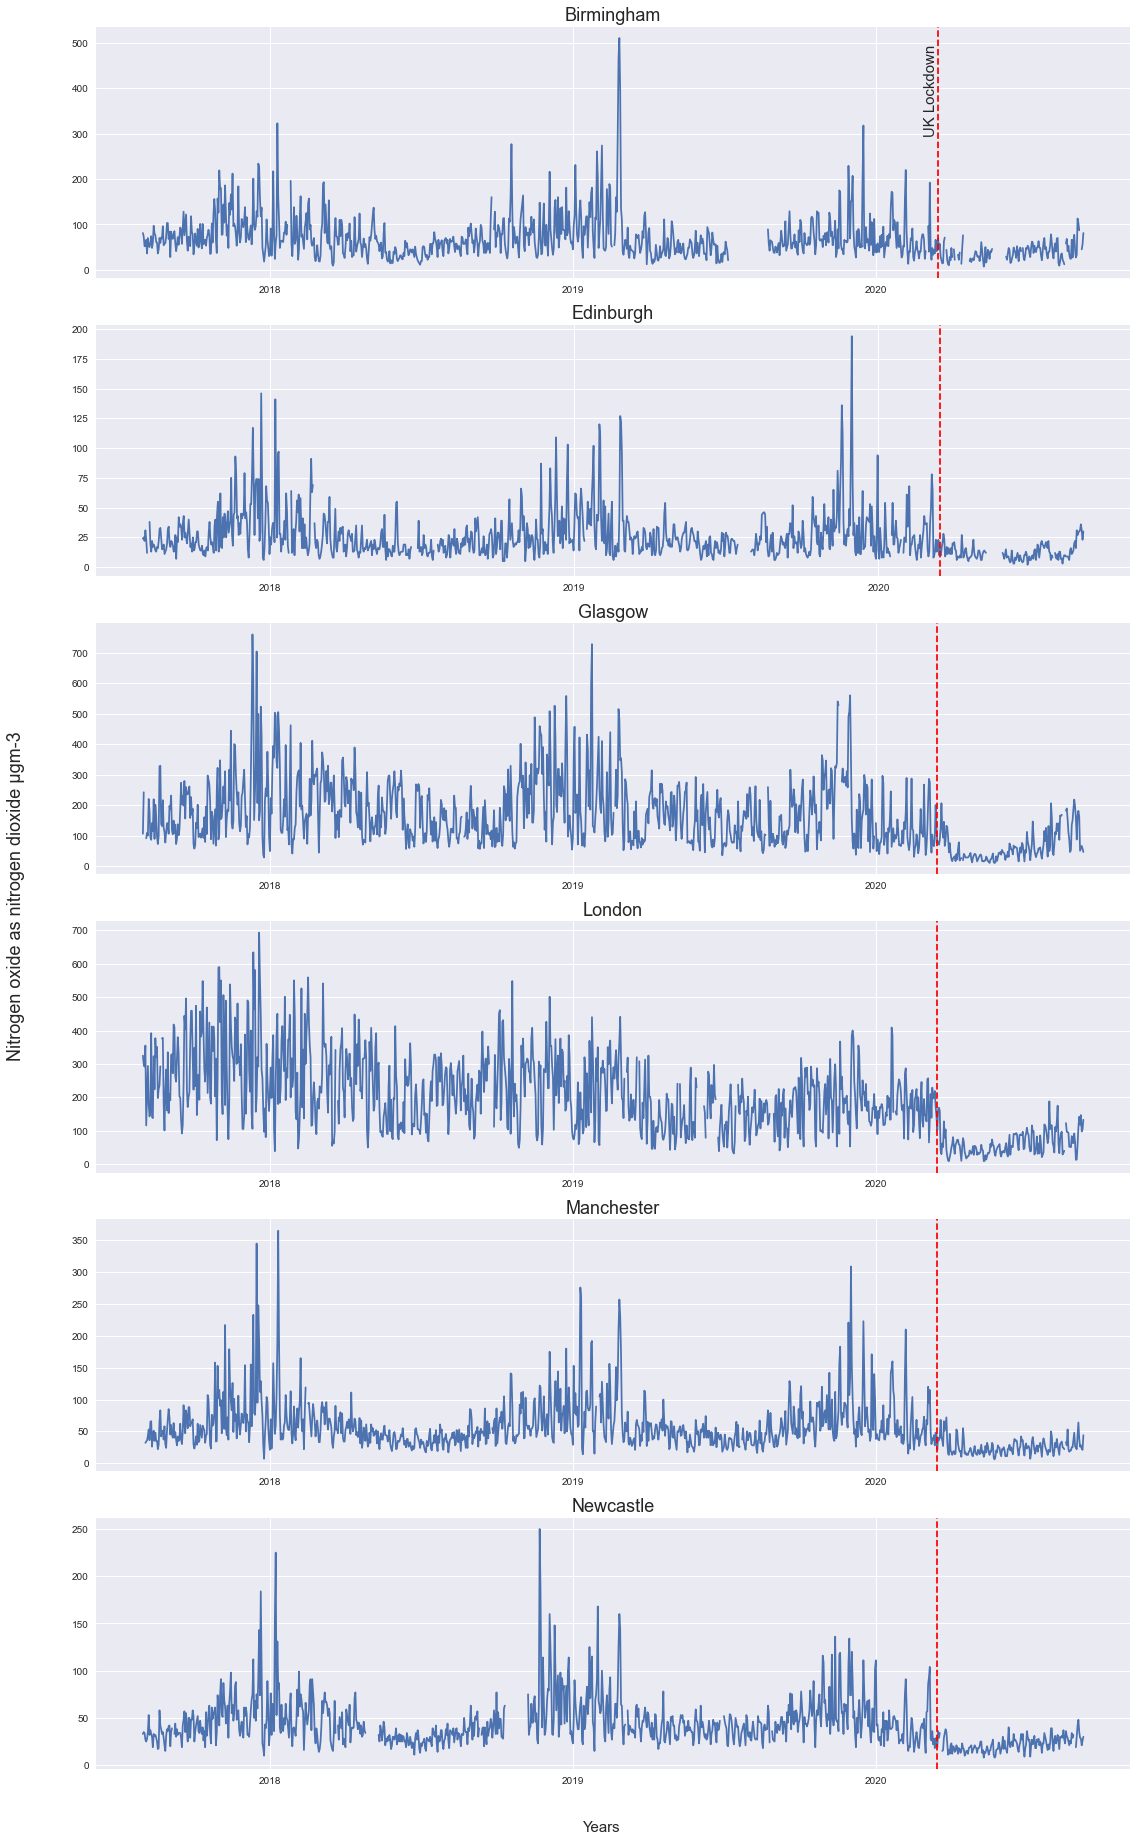

In [ ]:
#Plotting the 2017-2020 datasets available for NOx for major cities 

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, ncols=1, figsize=(15,25))

fig.text(0.5, -0.02, 'Years', ha='center', fontsize = 15)
fig.text(-0.05, 0.5, 'Nitrogen oxide as nitrogen dioxide µgm-3', va='center', rotation='vertical', fontsize = 18)

ax1.plot(date, birmingham)
ax1.set_title('Birmingham', fontsize = 18)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.tick_params(axis='x', labelsize=10)
xposition = [pd.to_datetime('2020-03-16')]
for xc in xposition:
    ax1.axvline(x=xc, color='r', linestyle='--')
    ax1.text('2020-02-28',300,'UK Lockdown',rotation=90, fontsize = 15)


ax2.plot(date, edinburgh)
ax2.set_title('Edinburgh', fontsize = 18)
ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)
xposition = [pd.to_datetime('2020-03-15')]
for xc in xposition:
    ax2.axvline(x=xc, color='r', linestyle='--')

ax3.plot(date, glasgow)
ax3.set_title('Glasgow', fontsize = 18)
ax3.xaxis.set_major_locator(years)
ax3.xaxis.set_major_formatter(years_fmt)
ax3.xaxis.set_minor_locator(months)
xposition = [pd.to_datetime('2020-03-15')]
for xc in xposition:
    ax3.axvline(x=xc, color='r', linestyle='--')

ax4.plot(date, london)
ax4.set_title('London', fontsize = 18)
ax4.xaxis.set_major_locator(years)
ax4.xaxis.set_major_formatter(years_fmt)
ax4.xaxis.set_minor_locator(months)
xposition = [pd.to_datetime('2020-03-15')]
for xc in xposition:
    ax4.axvline(x=xc, color='r', linestyle='--')
    
ax5.plot(date, manchester)
ax5.set_title('Manchester', fontsize = 18)
ax5.xaxis.set_major_locator(years)
ax5.xaxis.set_major_formatter(years_fmt)
ax5.xaxis.set_minor_locator(months)
xposition = [pd.to_datetime('2020-03-15')]
for xc in xposition:
    ax5.axvline(x=xc, color='r', linestyle='--')
    
ax6.plot(date, newcastle)
ax6.set_title('Newcastle', fontsize = 18)
ax6.xaxis.set_major_locator(years)
ax6.xaxis.set_major_formatter(years_fmt)
ax6.xaxis.set_minor_locator(months)
xposition = [pd.to_datetime('2020-03-15')]
for xc in xposition:
    ax6.axvline(x=xc, color='r', linestyle='--')
plt.tight_layout()

In [ ]:
#reading in stringency CSV - created in mySQL 
filename3 = 'D:/Sarah/Documents/Hackathon/stringency3.csv'
strdf = pd.read_csv(filename3)

In [ ]:
#convert dates to datetime for better plotting
strdf['Date'] = pd.to_datetime(strdf['Date'])

In [ ]:
#storing variables for ease 
date2 = strdf.loc[:, 'Date'].values
birmingham2 = strdf.loc[:, 'Birmingham A4540 Roadside'].values
edinburgh2 = strdf.loc[:, 'Edinburgh St Leonards'].values
glasgow2 = strdf.loc[:, 'Glasgow Kerbside'].values
london2 = strdf.loc[:, 'London Marylebone Road'].values
manchester2 = strdf.loc[:, 'Manchester Piccadilly'].values
newcastle2 = strdf.loc[:, 'Newcastle Centre'].values
stringency = strdf.loc[:,'Stringency'].values


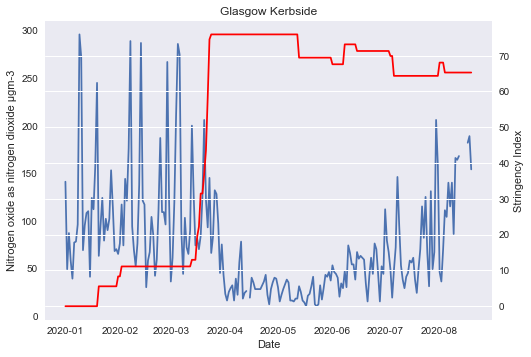

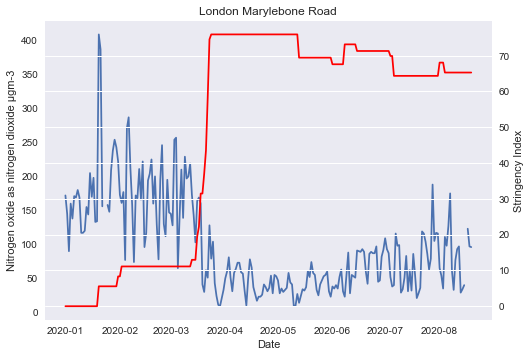

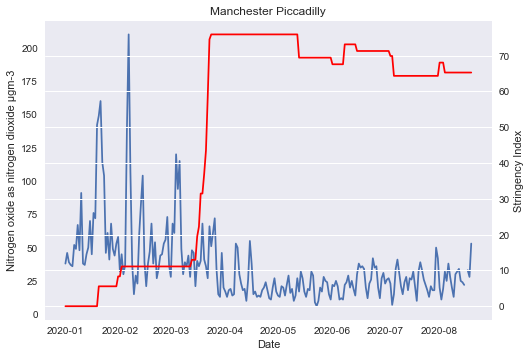

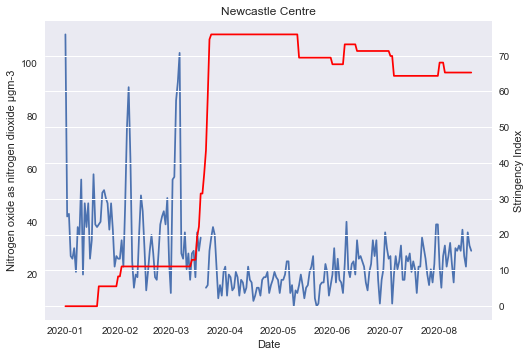

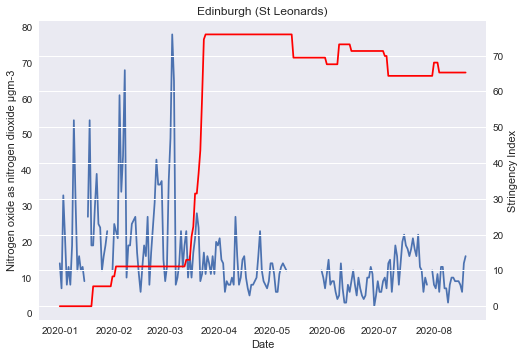

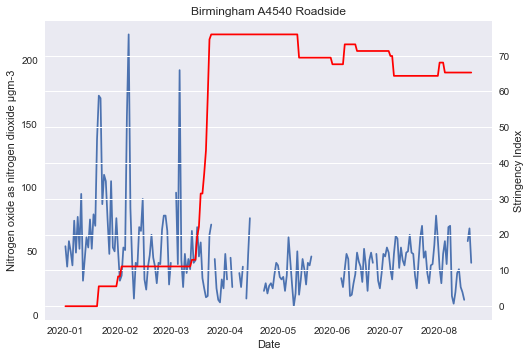

In [ ]:
#plotting NOx concentrations vs stringency
fig, ax = plt.subplots()
ax.plot(date2, glasgow2)
plt.xlabel ('Date')
plt.ylabel ('Nitrogen oxide as nitrogen dioxide µgm-3')
plt.title ('Glasgow Kerbside')
plt.style.use('seaborn')
ax.grid(False)

ax2 = ax.twinx()
ax2.plot(date2, stringency,color ="red")
ax2.set_ylabel("Stringency Index")
plt.show()

# format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.show()

fig, ax = plt.subplots()
ax.plot(date2, london2)
plt.xlabel ('Date')
plt.ylabel ('Nitrogen oxide as nitrogen dioxide µgm-3')
plt.title ('London Marylebone Road')
plt.style.use('seaborn')
ax.grid(False)

ax2 = ax.twinx()
ax2.plot(date2, stringency,color ="red")
ax2.set_ylabel("Stringency Index")
plt.show()

# format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.show()

fig, ax = plt.subplots()
ax.plot(date2, manchester2)
plt.xlabel ('Date')
plt.ylabel ('Nitrogen oxide as nitrogen dioxide µgm-3')
plt.title ('Manchester Piccadilly')
plt.style.use('seaborn')
ax.grid(False)

ax2 = ax.twinx()
ax2.plot(date2, stringency,color ="red")
ax2.set_ylabel("Stringency Index")
plt.show()

# format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.show()

fig, ax = plt.subplots()
ax.plot(date2, newcastle2)
plt.xlabel ('Date')
plt.ylabel ('Nitrogen oxide as nitrogen dioxide µgm-3')
plt.title ('Newcastle Centre')
plt.style.use('seaborn')
ax.grid(False)

ax2 = ax.twinx()
ax2.plot(date2, stringency,color ="red")
ax2.set_ylabel("Stringency Index")
plt.show()

# format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.show()


fig, ax = plt.subplots()
ax.plot(date2, edinburgh2)
plt.xlabel ('Date')
plt.ylabel ('Nitrogen oxide as nitrogen dioxide µgm-3')
plt.title ('Edinburgh (St Leonards)')
plt.style.use('seaborn')
ax.grid(False)

ax2 = ax.twinx()
ax2.plot(date2, stringency,color ="red")
ax2.set_ylabel("Stringency Index")
plt.show()

# format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.show()

fig, ax = plt.subplots()
ax.plot(date2, birmingham2)
plt.xlabel ('Date')
plt.ylabel ('Nitrogen oxide as nitrogen dioxide µgm-3')
plt.title ('Birmingham A4540 Roadside')
plt.style.use('seaborn')
ax.grid(False)

ax2 = ax.twinx()
ax2.plot(date2, stringency,color ="red")
ax2.set_ylabel("Stringency Index")
plt.show()

# format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.show()

When comparing NOx concentrations with stringency, it can be seen that there is some correlation between a high stringency index and low NOx concentrations. However, some of this may be attributed to higher temperatures and seasonal fluctuations. A sudden drop in NOx levels is particularly noticeable in Glasgow and London. 

#### __Results: In-depth analysis - using FacebookProphet to predict NOx without lockdown__

It seems to appear from the above analysis that lockdown impacted NOx concentrations in the months of March-August 2020. However, as NOx appears to reduce year on year, it is unclear how much higher the NOx concentrations would have been without lockdown restrictions. In order to gain an estimate, FBProphet was trialled as a predictive tool, due to its ability to account for seasonality. 

London was selected as a city to trial Prophet, due to having the most complete dataset for the past 5 years. London also has a much higher population (8.9 million) in comparison to the rest of the UK cities, alongside being a tourist destination. Therefore, it is much more likely to be impacted by people's travelling habits. 

Source: https://facebook.github.io/prophet/docs/quick_start.html 

In [ ]:
#import data. FBProphet requires specific column names. London.csv is data up to March 2020. LondonActual.csv is measured site data from March 2020. 
df = pd.read_csv('london.csv')
df2 = pd.read_csv('londonactual.csv')

In [ ]:
#make sure in date time
df['ds'] = pd.to_datetime(df['ds'])
df2['ds'] = pd.to_datetime(df2['ds'])

In [ ]:
#Prophet won't work with NA. 
df.dropna(inplace= True)

In [ ]:
m = Prophet()

In [ ]:
#Run prophet on data
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Program Files (x86)\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [ ]:
#predict and ask for preview 
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2144,2021-02-25,168.785724,36.581839,307.371554
2145,2021-02-26,153.442659,16.285096,295.944055
2146,2021-02-27,74.757415,-65.591769,201.187099
2147,2021-02-28,35.808380,-95.647930,164.828554
2148,2021-03-01,108.273241,-18.049304,245.090889


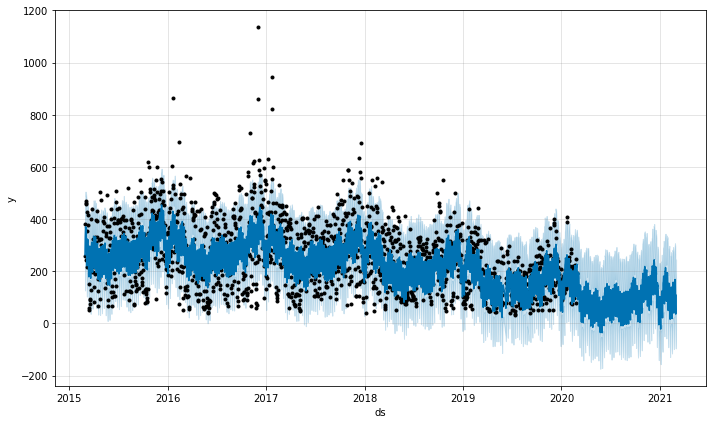

In [ ]:
#plot, where y = NOx as nitrogen dioxide in ugm-3 and ds = time 
fig1 = m.plot(forecast)

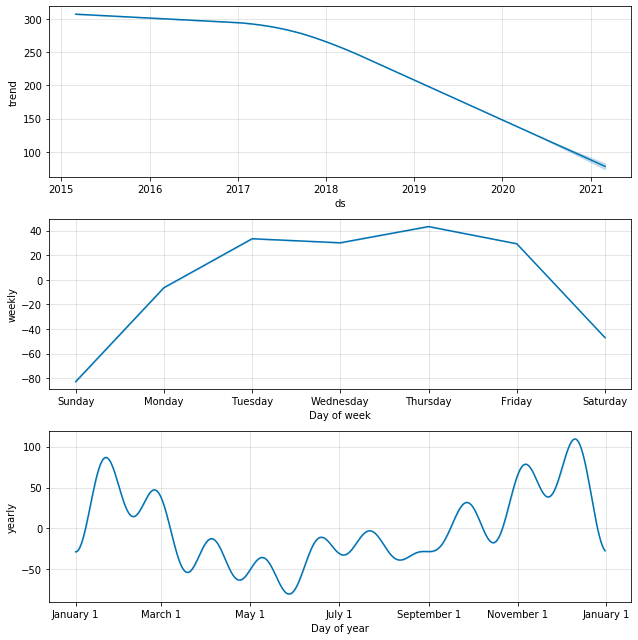

In [ ]:
#ask what components are causing variability 
fig2 = m.plot_components(forecast)

As previously noted from the data plots above, there tends to be lower NOx over summer months, which FBProphet has also identified. We can also see that NOx concentrations tend to be highest through Monday - Friday - the working week. NOx concentrations show a general decrease over time, which Prophet has predicted to continue into 2020 and 2021.

Next, we will select the predicted values from March 2020 - August 2020 and match these with the actual measured values.

In [ ]:
#selection of forecast data 
ncforecast = forecast[1783:1954]

In [ ]:
#preview data 
ncforecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1783,2020-03-01,138.025555,-45.494410,227.469940,138.025555,138.025555,-47.182010,-47.182010,-47.182010,-82.869253,-82.869253,-82.869253,35.687243,35.687243,35.687243,0.0,0.0,0.0,90.843545
1784,2020-03-02,137.860847,32.780904,292.366196,137.860847,137.860847,24.461348,24.461348,24.461348,-6.406932,-6.406932,-6.406932,30.868280,30.868280,30.868280,0.0,0.0,0.0,162.322195
1785,2020-03-03,137.696140,66.215595,332.947039,137.696140,137.696140,58.798171,58.798171,58.798171,33.443653,33.443653,33.443653,25.354518,25.354518,25.354518,0.0,0.0,0.0,196.494310
1786,2020-03-04,137.531432,51.404146,321.395806,137.531432,137.531432,49.415831,49.415831,49.415831,30.164752,30.164752,30.164752,19.251080,19.251080,19.251080,0.0,0.0,0.0,186.947263
1787,2020-03-05,137.366724,59.241221,316.228064,137.366724,137.366724,56.038229,56.038229,56.038229,43.358577,43.358577,43.358577,12.679652,12.679652,12.679652,0.0,0.0,0.0,193.404953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,2020-08-14,110.684076,-30.063314,234.793675,109.439748,111.913890,-8.646637,-8.646637,-8.646637,29.370994,29.370994,29.370994,-38.017632,-38.017632,-38.017632,0.0,0.0,0.0,102.037438
1950,2020-08-15,110.519368,-102.609870,163.186439,109.260859,111.758237,-84.412751,-84.412751,-84.412751,-47.061790,-47.061790,-47.061790,-37.350961,-37.350961,-37.350961,0.0,0.0,0.0,26.106617
1951,2020-08-16,110.354660,-130.026804,126.567566,109.083352,111.602584,-119.382436,-119.382436,-119.382436,-82.869253,-82.869253,-82.869253,-36.513182,-36.513182,-36.513182,0.0,0.0,0.0,-9.027775
1952,2020-08-17,110.189953,-70.665471,194.818530,108.906962,111.452712,-41.959303,-41.959303,-41.959303,-6.406932,-6.406932,-6.406932,-35.552371,-35.552371,-35.552371,0.0,0.0,0.0,68.230649


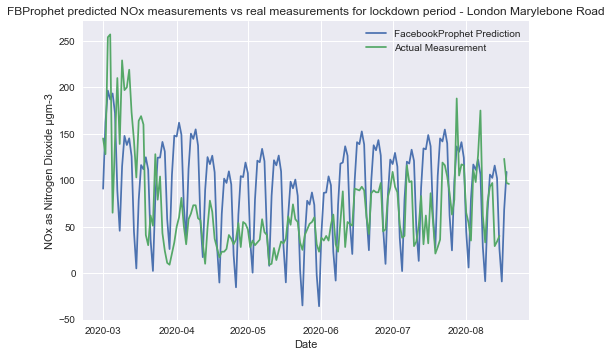

In [ ]:
#plotting of forecast data against real measured data. 

x = ncforecast['ds']
y = ncforecast['yhat']
x2 = df2['ds']
y2 = df2['y']

plt.plot(x,y, label ='FacebookProphet Prediction')
plt.plot(x2,y2, label = 'Actual Measurement')
plt.style.use('seaborn')
plt.title("FBProphet predicted NOx measurements vs real measurements for lockdown period - London Marylebone Road")
plt.xlabel('Date')
plt.ylabel('NOx as Nitrogen Dioxide μgm-3')
plt.legend()
plt.show()

We can see from the data above that Prophet is good at predicting daily seasonality (location of troughs and peaks). We can see that Prophet predicted much higher NOx concentrations for London, suggesting that stringency measures did indeed contribute slightly to decreased NOx concentrations. 

This is however, a simplification of a highly complex system, which would require a dedicated algorithm and several datasets which are currently unaccessible or incomplete. 

#### __Conclusions and recommendations__

Measured NOx concentrations in major UK cities are decreasing year on year, as the UK moves towards its sustainability targets. NOx concentrations also tend to fluctuate seasonally throughout the year, decreasing throughout the late Spring and Summer months. 

Despite seasonal fluctuations, there seems to be a correlation between the steep drop in NOx concentrations and the steep increase in stringency levels in March 2020, and is particularly evident in Glasgow and London.

As detailed in the previous section, the sudden reduction in NOx is likely due to a sudden change in people's travelling habits, associated with a move to studying and working from home. The closure of non-essential businesses and social distancing regulations likely contributed to this change, providing less reasons for travel into cities. 

However, whether these changes in habits are permanent are unknown, and are largely dependent on how long restrictions associated with the pandemic remain in place. The following section will address how transportation and travelling habits have changed, and provide further insight into the permanence of these changes. 

Predictions from FacebookProphet suggest that NOx would have been higher based on previous data, further supporting the hypothesis that lockdown habits impacted air quality. However, air chemistry is not straight forward to predict, and ideally a dedicated algorithm would be produced to take into account other atmospheric variables, such as wind strength. All variables should be defined and also must be readily available as datasets. Perhaps modelling one city (e.g. London) with well quantified air quality data would allow for the validation of FacebookProphet predictions.  

---

### 1. b) Transport habits during the COVID-19 pandemic

#### __Introduction__

This section will explore the changes to how people have been travelling since the start of the COVID-19 pandemic to date (March to September 2020).

- How have people been travelling during the pandemic?
- Where are people spending their time and how might that impact transport usage?
- Will these changes lead to a longer term change of habit?

#### b) i) Changes in use of different modes of transport during the COVID-19 pandemic

#### __Description of the data__

The dataset shows percentage change in transport usage by mode between a day before the pandemic and during. The data is provided daily.

#### __References__:

Department for Transport (2020). _Transport use during the coronavirus (COVID-19) pandemic._ Available at: https://www.gov.uk/government/statistics/transport-use-during-the-coronavirus-covid-19-pandemic (Accessed: 16 September 2020)

##### Notes about the data
- The data is presented each day as % change against a base day on an equivalent week. The base comparison dates vary for different modes of transport.
- Fluctuations occur due to weekends and bank holidays.
- The base date for the cycling figures is the first week of March, so seasonal patterns in cycling should be taken into account.

#### __Preparing the Data__

>Import relevant libraries and load the dataset.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
transport = pd.read_csv("data/COVID-19-transport-use-statistics-data.csv")

>Rename the columns and set the correct data types.

In [ ]:
# Rename columns.
transport.rename(columns = {'Date1\n (weekends and bank holidays in grey)':'Date','Cars2':'Cars','Light Commercial Vehicles2':'Light Commercial Vehicles','Heavy Goods Vehicles2':'Heavy Goods Vehicles','All motor vehicles2':'All motor vehicles','National Rail3,4':'National Rail','Transport for London Tube5':'Transport for London Tube','Transport for London Bus5,7':'Transport for London Bus','Bus (excl. London)6,8,9':'Bus (excl. London)','Cycling10,11':'Cycling'},inplace=True)

In [ ]:
# Change the Date column to type date
Date_clean = pd.to_datetime(transport['Date'].astype('str'), format='%d/%m/%Y')
transport = transport.assign(Date = Date_clean)

In [ ]:
# Create list of columns that represent the transport modes
transport_mode = []
for x in transport.columns:
    if x != 'Date':
        transport_mode.append(x)

In [ ]:
# Remove the % from data values. Remove references after '%'. Remove the 'r' infront of values which have been revised. Set empty values to NaN.
for x in transport_mode:
    transport[x] = transport[x].str.split('%').str[0]
    transport[x] = transport[x].str.replace(r'%','')
    transport[x] = transport[x].str.replace(r'r ','')
    transport[x] = transport[x].astype(str).replace(r'..',np.nan,regex=False)

>Drop days with a data point that is 'provisional' (indicated by 'p').

In [ ]:
print(transport.shape)
transport = transport.drop(transport[transport['National Rail'].str.match('p ')].index)
print(transport.shape)

(198, 10)
(190, 10)


>Convert values to numeric data type.

In [ ]:
for x in transport_mode:
    transport[x]=transport[x].astype(str).astype(float)
transport.dtypes

Date                         datetime64[ns]
Cars                                float64
Light Commercial Vehicles           float64
Heavy Goods Vehicles                float64
All motor vehicles                  float64
National Rail                       float64
Transport for London Tube           float64
Transport for London Bus            float64
Bus (excl. London)                  float64
Cycling                             float64
dtype: object

>Shift % values down by 100 to represent percentage increase and decrease around 0.

In [ ]:
transport_shift = transport
for x in transport_mode:
    transport_shift[x] = transport[x] - 100

>Export dataframe to excel file for visualisation.

In [ ]:
transport_shift.to_excel('data/COVID-19-transport-use-statistics-data-cleaned-shift.xlsx')

>Find the monthly average of each mode of transport, and an average for public transport.

In [ ]:
transport['Month'] = pd.DatetimeIndex(transport.loc[:,'Date']).month

In [ ]:
transport_month_average =transport.groupby([transport['Month']]).mean()

In [ ]:
transport_month_average['Average Public Transport'] = transport_public_month[['National Rail','Transport for London Tube','Transport for London Bus','Bus (excl. London)']].mean(axis=1)

In [ ]:
transport_month_average

,Cars,Light Commercial Vehicles,Heavy Goods Vehicles,All motor vehicles,National Rail,Transport for London Tube,Transport for London Bus,Bus (excl. London),Cycling,Average Public Transport
Month,,,,,,,,,,
3,-23.161290,-16.096774,-4.838710,-20.935484,-38.193548,-49.612903,-36.774194,-47.347826,1.416667,-42.982118
4,-66.766667,-59.233333,-38.133333,-63.833333,-95.433333,-95.300000,-82.944444,-88.666667,73.366667,-90.586111
5,-50.419355,-39.774194,-24.967742,-46.838710,-94.032258,-93.548387,NaN,-86.233333,115.580645,-91.271326
6,-31.033333,-17.900000,-8.833333,-27.133333,-86.700000,-87.266667,-68.545455,-79.633333,67.733333,-80.536364
7,-16.741935,-4.677419,-0.612903,-13.419355,-76.129032,-77.516129,-56.935484,-67.354839,46.677419,-69.483871
8,-9.290323,0.741935,0.193548,-6.709677,-65.516129,-68.322581,-45.806452,-56.870968,28.451613,-59.129032
9,-6.833333,4.500000,7.000000,-4.000000,-62.833333,-63.500000,-44.333333,-49.833333,34.166667,-55.125000


#### __Results: Changes in use of different modes of transport during the COVID-19 pandemic__

>__Key findings__:
>1. Private and commercial road vehicle use dropped significantly during the first three months of the pandemic, but has risen to just below base levels since.
>2. Cycling has increased overall but fluctuates with the weather.
>3. Public transport is well below normal usage levels. Trips were 90% below base levels in April 2020 and 59% below in August.

> The use of __cars, heavy goods vehicles and light commercial vehicles__ dropped to below 50% of normal usage in the first weeks after lockdown. With the easing of lockdown, the use of cars has moved to just below normal levels. In particular, on weekends car usage is fluctuating around the base level. Commercial vehicles have been around normal levels since the start of July.

![image.png](attachment:89330ddd-25e7-42c9-9c78-8a87a5cc3d7f.png)

>__Cycling__ has been above normal levels since the start of lockdown, with peaks of more than 250% above base levels during the summer. These levels fluctuate due to changes in the weather (they are compared to a base week in March) along with possible data quality issues.

![image.png](attachment:ffe6fb0e-f1b3-4f05-ace2-6b08690d97de.png)

>All __Public transport__ use dropped to over 90% below usual levels after lockdown (April average). It has risen again but remains at less than 50% of the usual amount. It seems that National Rail and the London Tube have seen the biggest reduction, between 65 and 70% less than base levels in August. TfL buses were 46% and non-London buses were 57% below base levels in August.

![image.png](attachment:4fc1361e-dbdb-4282-87d5-320866e3aba3.png)

#### b) ii) __Mobility patterns during the COVID-19 pandemic__

In this section we will investigate how people's mobility patterns have changed from March to September 2020. _Where_ people are travelling can then help us understand the reasons for the changes in _how_ people are travelling. From here we can discuss whether these changes reflect a longer term change of habit or a reaction to government guidelines.

#### __Description of the data__

The Google Community Mobility Reports dataset shows the percentage change of people visiting different places, split into categories. This is based on a comparison with the median value each day from the 5‑week period Jan 3 – Feb 6, 2020.

All categories measure a change in total visitors, apart from the Residential category which shows a change in duration.

Google (2020). _COVID-10 Community Mobility Reports - Regions CSV_ Available at: https://www.google.com/covid19/mobility/ (Accessed: 12 September 2020)

##### Notes about the data
- The baseline values do not account for seasonality, so some differences may be a natural increase or decrease due to the weather.
- Fluctuations occur due to bank holidays.
- Values are calculated based on data from users who have opted-in to Location History for their Google Account. Therefore the data is calculated from a sample of the population and may not represent the actual movement completely.
- Where the data did not meet quality and privacy thresholds, it has been left empy. 
- Google updated the way they calculate changes for Groceries & pharmacy, Retail & recreation, Transit stations, and Parks categories. For regions published before May 2020, the data may contain a consistent shift either up or down that starts between April 11–18, 2020.

#### __Preparing the Data__

>Import relevant libraries and load the dataset.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mobility = pd.read_csv("data/2020_GB_Region_Mobility_Report.csv")

>Rename the columns and set the correct data types.

In [ ]:
# Rename columns.
mobility.rename(columns = {'date':'Date','retail_and_recreation_percent_change_from_baseline':'Retail and Recreation','grocery_and_pharmacy_percent_change_from_baseline':'Grocery and Pharmacy','parks_percent_change_from_baseline':'Parks','transit_stations_percent_change_from_baseline':'Transit Stations','workplaces_percent_change_from_baseline':'Workplaces','residential_percent_change_from_baseline':'Residential'},inplace=True)

In [ ]:
# Change the Date column to type date
Date_clean_1 = pd.to_datetime(mobility['Date'].astype('str'), format='%Y-%m-%d')

In [ ]:
Date_clean_2 = pd.DatetimeIndex(Date_clean_1)

In [ ]:
mobility = mobility.assign(Date = Date_clean_2)

##### Create new dataframe with just the United Kingdom aggregated data.

>Drop rows which provide the region breakdown and keep only the overall UK data.

In [ ]:
mobility_uk = mobility[mobility['sub_region_1'].isnull()]

>Drop irrelevant columns.

In [ ]:
mobility_uk = mobility_uk.drop(['sub_region_1','sub_region_2','metro_area','iso_3166_2_code','census_fips_code'],axis=1)

>Find the average for each category over the first two weeks from March 23rd.

In [ ]:
mobility_uk_first_two_weeks = mobility_uk.set_index('Date')
mobility_uk_first_two_weeks = mobility_uk_first_two_weeks.loc['2020-03-23':'2020-04-05',:]
mobility_uk_first_two_weeks_grouped = mobility_uk_first_two_weeks.groupby(['country_region']).mean()
mobility_uk_first_two_weeks_grouped.reset_index(inplace=True)

>Find the average for each category over the first two weeks from August 24th.

In [ ]:
mobility_uk_last_two_weeks = mobility_uk.set_index('Date')
mobility_uk_last_two_weeks = mobility_uk_last_two_weeks.loc['2020-08-24':'2020-09-06',:]
mobility_uk_last_two_weeks_grouped = mobility_uk_last_two_weeks.groupby(['country_region']).mean()
mobility_uk_last_two_weeks_grouped.reset_index(inplace=True)

>Define a function to display the averages for given the category.

In [ ]:
def avg_first_last_two_weeks(category):
    print("For the ",category, "category, the average change over first two weeks (wc/ 23 March) was", round(mobility_uk_first_two_weeks_grouped[category][0],1),"% and the average change over the last two weeks (wc/ 24 August) was", round(mobility_uk_last_two_weeks_grouped[category][0],1),"%.")

>Export dataframe to excel file for visualisation.

In [ ]:
mobility_uk.to_excel('data/mobility-data-uk.xlsx')

##### Create a new datafram with 5 regions containing major cities: Manchester, London, Birminham, Newcastle, Edinburgh and Glasgow.

In [ ]:
cities = ['Greater Manchester','Greater London','West Midlands','Tyne and Wear','Edinburgh','Glasgow City']

>Create a new dataframe with just these regions.

In [ ]:
mobility_regions = mobility.loc[mobility['sub_region_1'].isin(cities),:]
mobility_regions = mobility_regions.copy()

>Some of these regions are split into smaller sub-regions in the dataset. We will take the average of these sub-regions to represent the whole region.

>Find the average for each sub-region on each day.

In [ ]:
mobility_regions_grouped=mobility_regions.groupby(['sub_region_1',mobility_regions['Date']]).mean()
mobility_regions_grouped.reset_index(inplace=True)

In [ ]:
mobility_regions_grouped.to_excel('data/mobility_regions_grouped.xlsx')

>We also want to compare regions by taking an average of each month, to then look at April and August. To do this we group by month.

In [ ]:
#Add new column of the months.
mobility_regions['Month'] = pd.DatetimeIndex(mobility_regions.loc[:,'Date']).month

In [ ]:
#Group by sub-region and month.
mobility_regions_month_grouped=mobility_regions.groupby(['sub_region_1',mobility_regions['Month']]).mean()

In [ ]:
#Drop irrelevant columns.
mobility_regions_month_grouped.drop(['metro_area','census_fips_code'],axis=1,inplace=True)

In [ ]:
#Reset the index
mobility_regions_month_grouped.reset_index(inplace=True)

>Export dataframe to excel file for visualisation.

In [ ]:
mobility_regions_month_grouped.to_excel('data/mobility_regions_month_grouped.xlsx')

#### __Results: Mobility patterns during the COVID-19 pandemic__

>__Key findings__:
>1. Overall movement to different places dropped significantly at the start of lockdown.
>2. People are still travelling less in August / September, albeit closer to base levels.
>3. The number of people travelling to workplaces is more than 40% below the base level on weekdays.
>4. There are regional differences in mobility patterns, but the overall trends over time are the same.

#### UK Mobility Trends

>The number of visits to __workplaces__ began to fall in the middle in March after the UK the government announced all unecessary travel should be stopped (March 15th). When most workplaces closed on March 23rd, the number of visits to workplaces reached over 60% below base level. Since then the levels have increased to between 40% and 50% below a base weekday, and under 10% below a base weekend.

>Visits to __transit stations__ also dropped significantly at the start of lockdown to 70% below base levels and still remain at more than 30% below pre-lockdown levels.

In [ ]:
avg_first_last_two_weeks('Workplaces')
avg_first_last_two_weeks('Transit Stations')

For the  Workplaces category, the average change over first two weeks (wc/ 23 March) was -62.1 % and the average change over the last two weeks (wc/ 24 August) was -36.0 %.
For the  Transit Stations category, the average change over first two weeks (wc/ 23 March) was -70.0 % and the average change over the last two weeks (wc/ 24 August) was -34.6 %.


![image.png](attachment:7105a3ed-ebff-4a83-8165-f45b9afbc2bf.png)

>Visits to __groceries and pharmacies__ had a small increase in the week leading up to lockdown but then dropped to around 30% below usual levels, and remain about 9% below.

>Duration spent in __residential__ spaces increased by 23% in the first two weeks of lockdown and is now 9% above usual levels.

In [ ]:
avg_first_last_two_weeks('Grocery and Pharmacy')
avg_first_last_two_weeks('Residential')

For the  Grocery and Pharmacy category, the average change over first two weeks (wc/ 23 March) was -30.9 % and the average change over the last two weeks (wc/ 24 August) was -8.6 %.
For the  Residential category, the average change over first two weeks (wc/ 23 March) was 23.6 % and the average change over the last two weeks (wc/ 24 August) was 8.6 %.


![image.png](attachment:42397200-979b-4e25-9298-c6f2738ffc40.png)

>Time spent in __shops and other recreational facilities__ had the largest decline in the first two weeks of lockdown, at a 75% decrease from base levels. The majority of places in this category would have been closed. Since shops have re-opened, levels have increased slowly, but were still around 13% below usual levels in the past two weeks.

>Visits to __parks__ also dropped slightly at the start of lockdown but increased above usual levels during May. This data can fluctuate with the weather since it is a comparison with a base level set in February and March.

In [ ]:
avg_first_last_two_weeks('Retail and Recreation')
avg_first_last_two_weeks('Parks')

For the  Retail and Recreation category, the average change over first two weeks (wc/ 23 March) was -74.6 % and the average change over the last two weeks (wc/ 24 August) was -12.5 %.
For the  Parks category, the average change over first two weeks (wc/ 23 March) was -26.2 % and the average change over the last two weeks (wc/ 24 August) was 92.9 %.


![image.png](attachment:8e6fccd0-897e-462b-aeae-497d7c71210e.png)

#### Mobility Trends in Different Regions

>The graph below shows the change in the number of visits to workplaces for different regions in the UK, by week.
>The West Midlands had the smallest change whilst Edinburgh had the largest. This may be due to the split of region as we cannot assume they have the same rural / urban makeup. There are oscillations between weekdays and weekends so we take the average per week to look at the trends over time.

![image.png](attachment:61a3721a-0476-4c2b-89fa-2cf376d7e3a2.png)

>Comparing the average over April and August, Edinburgh and Greater London have the greatest % decrease in visits to workplaces.

>If we compare with the change in Nitrogen Dioxide reductions from April 2019 to April 2020 (see part 1.a), there are similarities but a strong regional correlation cannot be confirmed at this point. London had one of the highest reductions in Nitrogen Dioxide and also one of highest reductions in visits to workplaces.

![image.png](attachment:5c64e7fd-a8ea-4069-b5ee-12adb9f2458b.png)

#### __Further research__

This report only examines people's travel habits so does not take into account other factors that contribute to air pollution. Future research may compare air quality with other changes such as industrial activity which was also halted during lockdown.

Another consideration of change of habits is people travelling to schools as they re-open in September. If a shift towards using cars, bicycles or walking occurs then this could impact overall transportation habits and, as a consequence, air quality.

---

#### __Conclusion: Transportation habits and the UK's Sustainability targets__

It is clear that the overall amount of travel in the UK has decreased in line with the increase in strincency levels. This is likely linked to a change in working habits, with a focus on working from home where possible. The closing of non-essential businesses and restrictions on social gatherings also reduced the need to travel, as reflected in people spending more time at home and making fewer trips to shops.

The reduction in car usage leads to less traffic, which ultimately leads to the reduction of NOx emissions in major cities. Although it is too soon to know the permanence of working from home, we can say that this shift has led to decreased NOx levels in major cities. If working patterns change permanently, or have more flexibility, this would help the UK meet its 25-year air quality targets.

However, it also must be considered that as the UK slowly lowers stringency levels, people are averse to using public transport, opting to use private transportation to reduce the likelihood of COVID-19 infection. This is shown by the level of car usage moving towards base levels in August and September, despite the lower level of overall movement of people.

The transportation data and the Google mobility data indicate a shift towards cycling and visiting parks during the lockdown period, which helps towards the UK's sustainability goal of engagement with the natural environment to aid general wellbeing. Visits to parks seem to remain high, but may be impacted by the upcoming winter and poorer weather. It is likely we will not know whether this is a permanent habit change until summer 2021.

---

## 2) Aggregate habits: The overall impact of the COVID-19 pandemic and sustainability on businesses, investors and consumers.

### 2. a) Economic impact of COVID-19 on companies by sector

#### __Introduction__

It's clear that the COVID-19 pandemic affected different sectors of the economy heterogeneously. Thus to begin to explore in what ways habits changed, and which sectors saw greater demand we began with a sector-level analysis of the UK economy. This involved merging stock price data provided with information on the sector of each company in the FTSE 100. 

#### __References__:

Yahoo Finance (2020), URL: https://finance.yahoo.com/ (Accessed on 12 August 2020)

#### __Preparing and exploring the Data__

In [2]:
import pip
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime 
from pandas_datareader import data

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Merge Yahoo finance stocks data with list of sectors for each company
csv3_df = pd.read_csv('hackathon_stocks3.csv')
csv3_df.head()
ts2_df = pd.read_csv('tickersector2.csv')
ts2_df.head()
result2 = pd.merge(csv3_df,ts2_df,on='ticker',how='inner')
result2

,ticker,13/08/2015,14/08/2015,17/08/2015,18/08/2015,19/08/2015,20/08/2015,21/08/2015,24/08/2015,25/08/2015,26/08/2015,27/08/2015,28/08/2015,01/09/2015,02/09/2015,03/09/2015,04/09/2015,07/09/2015,08/09/2015,09/09/2015,10/09/2015,11/09/2015,14/09/2015,15/09/2015,16/09/2015,17/09/2015,18/09/2015,21/09/2015,22/09/2015,23/09/2015,24/09/2015,25/09/2015,28/09/2015,29/09/2015,30/09/2015,01/10/2015,02/10/2015,05/10/2015,06/10/2015,07/10/2015,...,18/06/2020,19/06/2020,22/06/2020,23/06/2020,24/06/2020,25/06/2020,26/06/2020,29/06/2020,30/06/2020,01/07/2020,02/07/2020,03/07/2020,06/07/2020,07/07/2020,08/07/2020,09/07/2020,10/07/2020,13/07/2020,14/07/2020,15/07/2020,16/07/2020,17/07/2020,20/07/2020,21/07/2020,22/07/2020,23/07/2020,24/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020,03/08/2020,04/08/2020,05/08/2020,06/08/2020,07/08/2020,10/08/2020,11/08/2020,industryclassification
0,III,465.132538,467.772888,464.252441,463.372375,449.290772,441.809937,428.784485,414.438873,432.480835,421.919708,436.529297,432.832886,404.141663,416.023010,424.735962,415.670990,416.551086,423.503845,427.552307,421.567627,417.871185,413.206696,419.279388,421.303619,417.519196,410.830444,414.790833,406.869995,417.079132,412.766693,424.647980,414.702881,402.205444,410.390350,411.358460,415.142944,428.432373,433.536957,430.104645,...,816.599976,844.200012,826.400024,834.400024,788.000000,816.799988,823.400024,845.599976,832.599976,831.200012,846.400024,833.400024,863.400024,841.400024,821.400024,815.799988,825.200012,844.200012,831.200012,874.000000,867.000000,862.799988,865.0,870.000000,871.000000,867.000000,870.000000,870.000000,869.799988,884.200012,868.400024,889.599976,911.599976,903.400024,925.799988,918.200012,925.400024,917.000000,934.599976,Financial Services
1,ADM,1282.060059,1267.971558,1295.268066,1290.865479,1340.175659,1397.410400,1374.516479,1325.206299,1362.189087,1326.086670,1357.786133,1364.830688,1334.892334,1356.025391,1372.755371,1363.949951,1365.711182,1394.768677,1421.184814,1377.446655,1372.079956,1368.501953,1373.868652,1376.552002,1366.713135,1358.662964,1364.924072,1319.307495,1341.668701,1321.990845,1347.929688,1319.307495,1301.418457,1343.457520,1338.985474,1335.407471,1349.718628,1358.662964,1347.035400,...,2312.000000,2319.000000,2329.000000,2331.000000,2305.000000,2304.000000,2313.000000,2300.000000,2299.000000,2293.000000,2321.000000,2278.000000,2285.000000,2265.000000,2259.000000,2240.000000,2286.000000,2286.000000,2333.000000,2349.000000,2376.000000,2363.000000,NaN,2338.000000,2374.000000,2372.000000,2346.000000,2362.000000,2369.000000,2403.000000,2395.000000,2400.000000,2459.000000,2471.000000,2492.000000,2485.000000,2520.000000,2536.000000,2525.000000,Nonlife Insurance
2,AAL,649.455261,642.577637,641.219238,629.926514,602.331726,628.737854,622.200012,560.557312,580.510620,564.038574,616.680969,629.162415,581.104858,580.595398,615.577209,567.604614,575.416199,597.661865,630.775635,608.784668,609.973450,608.699646,624.237793,636.209656,624.407654,611.331848,590.020142,550.283630,558.774353,530.330444,521.924683,469.282135,461.130981,467.753845,471.234985,470.046295,492.037262,513.009277,564.208313,...,1770.938843,1804.646606,1807.406372,1858.460693,1801.689697,1815.291138,1813.122803,1838.157227,1842.493896,1798.535889,1845.647827,1808.588989,1833.426270,1815.291138,1847.027710,1857.475098,1897.293701,1939.871826,1939.083374,1925.284912,1902.812988,1931.001343,NaN,1921.145264,1911.683472,1934.352417,1928.438843,1956.233032,1956.430054,1945.391357,1856.489502,1843.282349,1883.100830,1853.138428,1939.477661,1901.827393,1860.629150,1876.201660,1896.505127,Mining
3,ANTO,503.366699,500.728882,504.245911,493.694977,485.342194,502.487366,495.013824,468.636597,509.521271,493.694977,537.657227,535.458984,505.125122,507.762756,524.468506,496.332703,533.700562,536.338196,540.734436,531.502441,534.140137,520.951477,532.381592,531.502441,520.064392,511.242218,498.891296,462.720612,462.720612,451.251801,446.399628,424.344391,433.

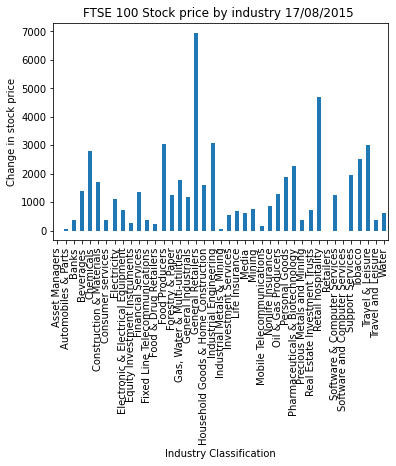

In [4]:
#Check merge by looking at how stock prices vary by industry at a specific by date
result2.groupby('industryclassification')['17/08/2015'].mean().plot(kind='bar').set_title('FTSE 100 Stock price by industry 17/08/2015 ')
plt.ylabel('Change in stock price')
plt.xlabel('Industry Classification')
plt.show()

In [16]:
#Find locations of columns for key dates to caluculate change over the pandemic
result2.columns.get_loc("01/04/2019")

918

In [15]:
result2.columns.get_loc("28/06/2019")

978

In [14]:
# Find the mean stock price in Q2 2019
result2['meanq22019'] = result2.iloc[:, [918,978]].mean(axis=1)
result2

,ticker,13/08/2015,14/08/2015,17/08/2015,18/08/2015,19/08/2015,20/08/2015,21/08/2015,24/08/2015,25/08/2015,26/08/2015,27/08/2015,28/08/2015,01/09/2015,02/09/2015,03/09/2015,04/09/2015,07/09/2015,08/09/2015,09/09/2015,10/09/2015,11/09/2015,14/09/2015,15/09/2015,16/09/2015,17/09/2015,18/09/2015,21/09/2015,22/09/2015,23/09/2015,24/09/2015,25/09/2015,28/09/2015,29/09/2015,30/09/2015,01/10/2015,02/10/2015,05/10/2015,06/10/2015,07/10/2015,...,22/06/2020,23/06/2020,24/06/2020,25/06/2020,26/06/2020,29/06/2020,30/06/2020,01/07/2020,02/07/2020,03/07/2020,06/07/2020,07/07/2020,08/07/2020,09/07/2020,10/07/2020,13/07/2020,14/07/2020,15/07/2020,16/07/2020,17/07/2020,20/07/2020,21/07/2020,22/07/2020,23/07/2020,24/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020,03/08/2020,04/08/2020,05/08/2020,06/08/2020,07/08/2020,10/08/2020,11/08/2020,industryclassification,meanq22019,meanq22020
0,III,465.132538,467.772888,464.252441,463.372375,449.290772,441.809937,428.784485,414.438873,432.480835,421.919708,436.529297,432.832886,404.141663,416.023010,424.735962,415.670990,416.551086,423.503845,427.552307,421.567627,417.871185,413.206696,419.279388,421.303619,417.519196,410.830444,414.790833,406.869995,417.079132,412.766693,424.647980,414.702881,402.205444,410.390350,411.358460,415.142944,428.432373,433.536957,430.104645,...,826.400024,834.400024,788.000000,816.799988,823.400024,845.599976,832.599976,831.200012,846.400024,833.400024,863.400024,841.400024,821.400024,815.799988,825.200012,844.200012,831.200012,874.000000,867.000000,862.799988,865.0,870.000000,871.000000,867.000000,870.000000,870.000000,869.799988,884.200012,868.400024,889.599976,911.599976,903.400024,925.799988,918.200012,925.400024,917.000000,934.599976,Financial Services,1007.425964,765.944366
1,ADM,1282.060059,1267.971558,1295.268066,1290.865479,1340.175659,1397.410400,1374.516479,1325.206299,1362.189087,1326.086670,1357.786133,1364.830688,1334.892334,1356.025391,1372.755371,1363.949951,1365.711182,1394.768677,1421.184814,1377.446655,1372.079956,1368.501953,1373.868652,1376.552002,1366.713135,1358.662964,1364.924072,1319.307495,1341.668701,1321.990845,1347.929688,1319.307495,1301.418457,1343.457520,1338.985474,1335.407471,1349.718628,1358.662964,1347.035400,...,2329.000000,2331.000000,2305.000000,2304.000000,2313.000000,2300.000000,2299.000000,2293.000000,2321.000000,2278.000000,2285.000000,2265.000000,2259.000000,2240.000000,2286.000000,2286.000000,2333.000000,2349.000000,2376.000000,2363.000000,NaN,2338.000000,2374.000000,2372.000000,2346.000000,2362.000000,2369.000000,2403.000000,2395.000000,2400.000000,2459.000000,2471.000000,2492.000000,2485.000000,2520.000000,2536.000000,2525.000000,Nonlife Insurance,2109.170410,2247.779419
2,AAL,649.455261,642.577637,641.219238,629.926514,602.331726,628.737854,622.200012,560.557312,580.510620,564.038574,616.680969,629.162415,581.104858,580.595398,615.577209,567.604614,575.416199,597.661865,630.775635,608.784668,609.973450,608.699646,624.237793,636.209656,624.407654,611.331848,590.020142,550.283630,558.774353,530.330444,521.924683,469.282135,461.130981,467.753845,471.234985,470.046295,492.037262,513.009277,564.208313,...,1807.406372,1858.460693,1801.689697,1815.291138,1813.122803,1838.157227,1842.493896,1798.535889,1845.647827,1808.588989,1833.426270,1815.291138,1847.027710,1857.475098,1897.293701,1939.871826,1939.083374,1925.284912,1902.812988,1931.001343,NaN,1921.145264,1911.683472,1934.352417,1928.438843,1956.233032,1956.430054,1945.391357,1856.489502,1843.282349,1883.100830,1853.138428,1939.477661,1901.827393,1860.629150,1876.201660,1896.505127,Mining,2028.645996,1569.283630
3,ANTO,503.366699,500.728882,504.245911,493.694977,485.342194,502.487366,495.013824,468.636597,509.521271,493.694977,537.657227,535.458984,505.125122,507.762756,524.468506,496.332703,533.700562,536.338196,540.734436,531.502441,534.140137,520.951477,532.381592,531.502441,520.064392,511.242218,498.891296,462.720612,462.720612,451.251801,446.399628,424.344391,433

In [13]:
result2.columns.get_loc("01/04/2020")

1172

In [12]:
result2.columns.get_loc("30/06/2020")

1232

In [11]:
# Find the mean stock price for Q2 2020
result2['meanq22020'] = result2.iloc[:, [1172,1232]].mean(axis=1)
result2

,ticker,13/08/2015,14/08/2015,17/08/2015,18/08/2015,19/08/2015,20/08/2015,21/08/2015,24/08/2015,25/08/2015,26/08/2015,27/08/2015,28/08/2015,01/09/2015,02/09/2015,03/09/2015,04/09/2015,07/09/2015,08/09/2015,09/09/2015,10/09/2015,11/09/2015,14/09/2015,15/09/2015,16/09/2015,17/09/2015,18/09/2015,21/09/2015,22/09/2015,23/09/2015,24/09/2015,25/09/2015,28/09/2015,29/09/2015,30/09/2015,01/10/2015,02/10/2015,05/10/2015,06/10/2015,07/10/2015,...,22/06/2020,23/06/2020,24/06/2020,25/06/2020,26/06/2020,29/06/2020,30/06/2020,01/07/2020,02/07/2020,03/07/2020,06/07/2020,07/07/2020,08/07/2020,09/07/2020,10/07/2020,13/07/2020,14/07/2020,15/07/2020,16/07/2020,17/07/2020,20/07/2020,21/07/2020,22/07/2020,23/07/2020,24/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020,03/08/2020,04/08/2020,05/08/2020,06/08/2020,07/08/2020,10/08/2020,11/08/2020,industryclassification,meanq22019,meanq22020
0,III,465.132538,467.772888,464.252441,463.372375,449.290772,441.809937,428.784485,414.438873,432.480835,421.919708,436.529297,432.832886,404.141663,416.023010,424.735962,415.670990,416.551086,423.503845,427.552307,421.567627,417.871185,413.206696,419.279388,421.303619,417.519196,410.830444,414.790833,406.869995,417.079132,412.766693,424.647980,414.702881,402.205444,410.390350,411.358460,415.142944,428.432373,433.536957,430.104645,...,826.400024,834.400024,788.000000,816.799988,823.400024,845.599976,832.599976,831.200012,846.400024,833.400024,863.400024,841.400024,821.400024,815.799988,825.200012,844.200012,831.200012,874.000000,867.000000,862.799988,865.0,870.000000,871.000000,867.000000,870.000000,870.000000,869.799988,884.200012,868.400024,889.599976,911.599976,903.400024,925.799988,918.200012,925.400024,917.000000,934.599976,Financial Services,1007.425964,765.944366
1,ADM,1282.060059,1267.971558,1295.268066,1290.865479,1340.175659,1397.410400,1374.516479,1325.206299,1362.189087,1326.086670,1357.786133,1364.830688,1334.892334,1356.025391,1372.755371,1363.949951,1365.711182,1394.768677,1421.184814,1377.446655,1372.079956,1368.501953,1373.868652,1376.552002,1366.713135,1358.662964,1364.924072,1319.307495,1341.668701,1321.990845,1347.929688,1319.307495,1301.418457,1343.457520,1338.985474,1335.407471,1349.718628,1358.662964,1347.035400,...,2329.000000,2331.000000,2305.000000,2304.000000,2313.000000,2300.000000,2299.000000,2293.000000,2321.000000,2278.000000,2285.000000,2265.000000,2259.000000,2240.000000,2286.000000,2286.000000,2333.000000,2349.000000,2376.000000,2363.000000,NaN,2338.000000,2374.000000,2372.000000,2346.000000,2362.000000,2369.000000,2403.000000,2395.000000,2400.000000,2459.000000,2471.000000,2492.000000,2485.000000,2520.000000,2536.000000,2525.000000,Nonlife Insurance,2109.170410,2247.779419
2,AAL,649.455261,642.577637,641.219238,629.926514,602.331726,628.737854,622.200012,560.557312,580.510620,564.038574,616.680969,629.162415,581.104858,580.595398,615.577209,567.604614,575.416199,597.661865,630.775635,608.784668,609.973450,608.699646,624.237793,636.209656,624.407654,611.331848,590.020142,550.283630,558.774353,530.330444,521.924683,469.282135,461.130981,467.753845,471.234985,470.046295,492.037262,513.009277,564.208313,...,1807.406372,1858.460693,1801.689697,1815.291138,1813.122803,1838.157227,1842.493896,1798.535889,1845.647827,1808.588989,1833.426270,1815.291138,1847.027710,1857.475098,1897.293701,1939.871826,1939.083374,1925.284912,1902.812988,1931.001343,NaN,1921.145264,1911.683472,1934.352417,1928.438843,1956.233032,1956.430054,1945.391357,1856.489502,1843.282349,1883.100830,1853.138428,1939.477661,1901.827393,1860.629150,1876.201660,1896.505127,Mining,2028.645996,1569.283630
3,ANTO,503.366699,500.728882,504.245911,493.694977,485.342194,502.487366,495.013824,468.636597,509.521271,493.694977,537.657227,535.458984,505.125122,507.762756,524.468506,496.332703,533.700562,536.338196,540.734436,531.502441,534.140137,520.951477,532.381592,531.502441,520.064392,511.242218,498.891296,462.720612,462.720612,451.251801,446.399628,424.344391,433

In [17]:
# Calculate the chane in mean stock price over 1 year
result2['changemeanq2'] = result2['meanq22020']-result2['meanq22019']
result2

,ticker,13/08/2015,14/08/2015,17/08/2015,18/08/2015,19/08/2015,20/08/2015,21/08/2015,24/08/2015,25/08/2015,26/08/2015,27/08/2015,28/08/2015,01/09/2015,02/09/2015,03/09/2015,04/09/2015,07/09/2015,08/09/2015,09/09/2015,10/09/2015,11/09/2015,14/09/2015,15/09/2015,16/09/2015,17/09/2015,18/09/2015,21/09/2015,22/09/2015,23/09/2015,24/09/2015,25/09/2015,28/09/2015,29/09/2015,30/09/2015,01/10/2015,02/10/2015,05/10/2015,06/10/2015,07/10/2015,...,23/06/2020,24/06/2020,25/06/2020,26/06/2020,29/06/2020,30/06/2020,01/07/2020,02/07/2020,03/07/2020,06/07/2020,07/07/2020,08/07/2020,09/07/2020,10/07/2020,13/07/2020,14/07/2020,15/07/2020,16/07/2020,17/07/2020,20/07/2020,21/07/2020,22/07/2020,23/07/2020,24/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020,03/08/2020,04/08/2020,05/08/2020,06/08/2020,07/08/2020,10/08/2020,11/08/2020,industryclassification,meanq22019,meanq22020,changemeanq2
0,III,465.132538,467.772888,464.252441,463.372375,449.290772,441.809937,428.784485,414.438873,432.480835,421.919708,436.529297,432.832886,404.141663,416.023010,424.735962,415.670990,416.551086,423.503845,427.552307,421.567627,417.871185,413.206696,419.279388,421.303619,417.519196,410.830444,414.790833,406.869995,417.079132,412.766693,424.647980,414.702881,402.205444,410.390350,411.358460,415.142944,428.432373,433.536957,430.104645,...,834.400024,788.000000,816.799988,823.400024,845.599976,832.599976,831.200012,846.400024,833.400024,863.400024,841.400024,821.400024,815.799988,825.200012,844.200012,831.200012,874.000000,867.000000,862.799988,865.0,870.000000,871.000000,867.000000,870.000000,870.000000,869.799988,884.200012,868.400024,889.599976,911.599976,903.400024,925.799988,918.200012,925.400024,917.000000,934.599976,Financial Services,1007.425964,765.944366,-241.481598
1,ADM,1282.060059,1267.971558,1295.268066,1290.865479,1340.175659,1397.410400,1374.516479,1325.206299,1362.189087,1326.086670,1357.786133,1364.830688,1334.892334,1356.025391,1372.755371,1363.949951,1365.711182,1394.768677,1421.184814,1377.446655,1372.079956,1368.501953,1373.868652,1376.552002,1366.713135,1358.662964,1364.924072,1319.307495,1341.668701,1321.990845,1347.929688,1319.307495,1301.418457,1343.457520,1338.985474,1335.407471,1349.718628,1358.662964,1347.035400,...,2331.000000,2305.000000,2304.000000,2313.000000,2300.000000,2299.000000,2293.000000,2321.000000,2278.000000,2285.000000,2265.000000,2259.000000,2240.000000,2286.000000,2286.000000,2333.000000,2349.000000,2376.000000,2363.000000,NaN,2338.000000,2374.000000,2372.000000,2346.000000,2362.000000,2369.000000,2403.000000,2395.000000,2400.000000,2459.000000,2471.000000,2492.000000,2485.000000,2520.000000,2536.000000,2525.000000,Nonlife Insurance,2109.170410,2247.779419,138.609009
2,AAL,649.455261,642.577637,641.219238,629.926514,602.331726,628.737854,622.200012,560.557312,580.510620,564.038574,616.680969,629.162415,581.104858,580.595398,615.577209,567.604614,575.416199,597.661865,630.775635,608.784668,609.973450,608.699646,624.237793,636.209656,624.407654,611.331848,590.020142,550.283630,558.774353,530.330444,521.924683,469.282135,461.130981,467.753845,471.234985,470.046295,492.037262,513.009277,564.208313,...,1858.460693,1801.689697,1815.291138,1813.122803,1838.157227,1842.493896,1798.535889,1845.647827,1808.588989,1833.426270,1815.291138,1847.027710,1857.475098,1897.293701,1939.871826,1939.083374,1925.284912,1902.812988,1931.001343,NaN,1921.145264,1911.683472,1934.352417,1928.438843,1956.233032,1956.430054,1945.391357,1856.489502,1843.282349,1883.100830,1853.138428,1939.477661,1901.827393,1860.629150,1876.201660,1896.505127,Mining,2028.645996,1569.283630,-459.362366
3,ANTO,503.366699,500.728882,504.245911,493.694977,485.342194,502.487366,495.013824,468.636597,509.521271,493.694977,537.657227,535.458984,505.125122,507.762756,524.468506,496.332703,533.700562,536.338196,540.734436,531.502441,534.140137,520.951477,532.381592,531.502441,520.064392,511.242218,498.891296,462.720612,462.720612,451.251801,446.399628,424.344391,4

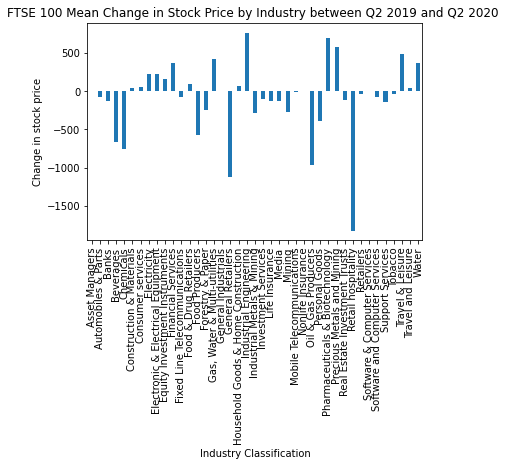

In [18]:
# Plot the absolute mean change in stock price for each industry beetween Q2 2019 and Q2 2020
result2.groupby('industryclassification')['changemeanq2'].mean().plot(kind='bar').set_title('FTSE 100 Mean Change in Stock Price by Industry between Q2 2019 and Q2 2020 ')
plt.ylabel('Change in stock price')
plt.xlabel('Industry Classification')
plt.show()

In [19]:
# Calculate the percentage change in mean stock price over one year
result2['percentchangeq2'] = (result2['meanq22020']-result2['meanq22019'])*100/ (result2['meanq22019'])
result2

,ticker,13/08/2015,14/08/2015,17/08/2015,18/08/2015,19/08/2015,20/08/2015,21/08/2015,24/08/2015,25/08/2015,26/08/2015,27/08/2015,28/08/2015,01/09/2015,02/09/2015,03/09/2015,04/09/2015,07/09/2015,08/09/2015,09/09/2015,10/09/2015,11/09/2015,14/09/2015,15/09/2015,16/09/2015,17/09/2015,18/09/2015,21/09/2015,22/09/2015,23/09/2015,24/09/2015,25/09/2015,28/09/2015,29/09/2015,30/09/2015,01/10/2015,02/10/2015,05/10/2015,06/10/2015,07/10/2015,...,24/06/2020,25/06/2020,26/06/2020,29/06/2020,30/06/2020,01/07/2020,02/07/2020,03/07/2020,06/07/2020,07/07/2020,08/07/2020,09/07/2020,10/07/2020,13/07/2020,14/07/2020,15/07/2020,16/07/2020,17/07/2020,20/07/2020,21/07/2020,22/07/2020,23/07/2020,24/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020,03/08/2020,04/08/2020,05/08/2020,06/08/2020,07/08/2020,10/08/2020,11/08/2020,industryclassification,meanq22019,meanq22020,changemeanq2,percentchangeq2
0,III,465.132538,467.772888,464.252441,463.372375,449.290772,441.809937,428.784485,414.438873,432.480835,421.919708,436.529297,432.832886,404.141663,416.023010,424.735962,415.670990,416.551086,423.503845,427.552307,421.567627,417.871185,413.206696,419.279388,421.303619,417.519196,410.830444,414.790833,406.869995,417.079132,412.766693,424.647980,414.702881,402.205444,410.390350,411.358460,415.142944,428.432373,433.536957,430.104645,...,788.000000,816.799988,823.400024,845.599976,832.599976,831.200012,846.400024,833.400024,863.400024,841.400024,821.400024,815.799988,825.200012,844.200012,831.200012,874.000000,867.000000,862.799988,865.0,870.000000,871.000000,867.000000,870.000000,870.000000,869.799988,884.200012,868.400024,889.599976,911.599976,903.400024,925.799988,918.200012,925.400024,917.000000,934.599976,Financial Services,1007.425964,765.944366,-241.481598,-23.970158
1,ADM,1282.060059,1267.971558,1295.268066,1290.865479,1340.175659,1397.410400,1374.516479,1325.206299,1362.189087,1326.086670,1357.786133,1364.830688,1334.892334,1356.025391,1372.755371,1363.949951,1365.711182,1394.768677,1421.184814,1377.446655,1372.079956,1368.501953,1373.868652,1376.552002,1366.713135,1358.662964,1364.924072,1319.307495,1341.668701,1321.990845,1347.929688,1319.307495,1301.418457,1343.457520,1338.985474,1335.407471,1349.718628,1358.662964,1347.035400,...,2305.000000,2304.000000,2313.000000,2300.000000,2299.000000,2293.000000,2321.000000,2278.000000,2285.000000,2265.000000,2259.000000,2240.000000,2286.000000,2286.000000,2333.000000,2349.000000,2376.000000,2363.000000,NaN,2338.000000,2374.000000,2372.000000,2346.000000,2362.000000,2369.000000,2403.000000,2395.000000,2400.000000,2459.000000,2471.000000,2492.000000,2485.000000,2520.000000,2536.000000,2525.000000,Nonlife Insurance,2109.170410,2247.779419,138.609009,6.571731
2,AAL,649.455261,642.577637,641.219238,629.926514,602.331726,628.737854,622.200012,560.557312,580.510620,564.038574,616.680969,629.162415,581.104858,580.595398,615.577209,567.604614,575.416199,597.661865,630.775635,608.784668,609.973450,608.699646,624.237793,636.209656,624.407654,611.331848,590.020142,550.283630,558.774353,530.330444,521.924683,469.282135,461.130981,467.753845,471.234985,470.046295,492.037262,513.009277,564.208313,...,1801.689697,1815.291138,1813.122803,1838.157227,1842.493896,1798.535889,1845.647827,1808.588989,1833.426270,1815.291138,1847.027710,1857.475098,1897.293701,1939.871826,1939.083374,1925.284912,1902.812988,1931.001343,NaN,1921.145264,1911.683472,1934.352417,1928.438843,1956.233032,1956.430054,1945.391357,1856.489502,1843.282349,1883.100830,1853.138428,1939.477661,1901.827393,1860.629150,1876.201660,1896.505127,Mining,2028.645996,1569.283630,-459.362366,-22.643791
3,ANTO,503.366699,500.728882,504.245911,493.694977,485.342194,502.487366,495.013824,468.636597,509.521271,493.694977,537.657227,535.458984,505.125122,507.762756,524.468506,496.332703,533.700562,536.338196,540.734436,531.502441,534.140137,520.951477,532.381592,531.502441,520.064392,511.242218,498.891296,462.720612,462.720612,451.251801,446.399628,424.344391,

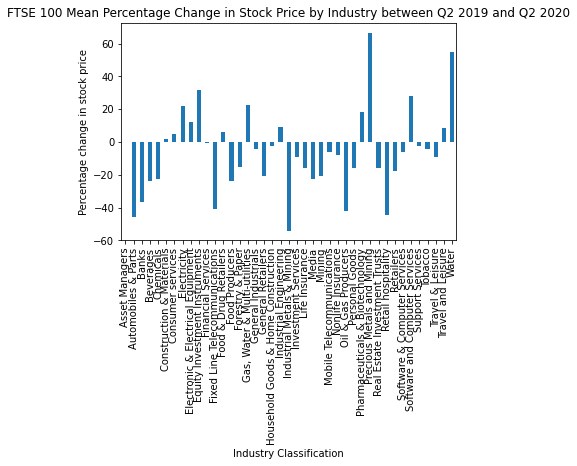

In [25]:
result2.groupby('industryclassification')['percentchangeq2'].mean().plot(kind='bar').set_title('FTSE 100 Mean Percentage Change in Stock Price by Industry between Q2 2019 and Q2 2020')
plt.ylabel('Percentage change in stock price')
plt.xlabel('Industry Classification')
plt.show()

In [21]:
# Create the percentage change in mean stock price by industry
industrypercentchange = result2.groupby('industryclassification')['percentchangeq2'].mean()
type(industrypercentchange)

pandas.core.series.Series

In [22]:
# Find the industries with the largest percentage incease in stock price
largest= industrypercentchange.nlargest(n=5, keep='first')
largest 

industryclassification
Precious Metals and Mining        66.622579
Water                             55.115205
Equity Investment Instruments     32.031755
Software and Computer Services    28.340028
Gas, Water & Multi-utilities      22.678958
Name: percentchangeq2, dtype: float64

In [23]:
# Find the industries with the largest percentage decease in stock price
smallest = industrypercentchange.nsmallest(n=5, keep='first')
smallest.sort_values(ascending=False)

industryclassification
Fixed Line Telecommunications   -40.719483
Oil & Gas Producers             -42.239573
Retail hospitality              -44.453365
Automobiles & Parts             -45.908630
Industrial Metals & Mining      -53.991951
Name: percentchangeq2, dtype: float64

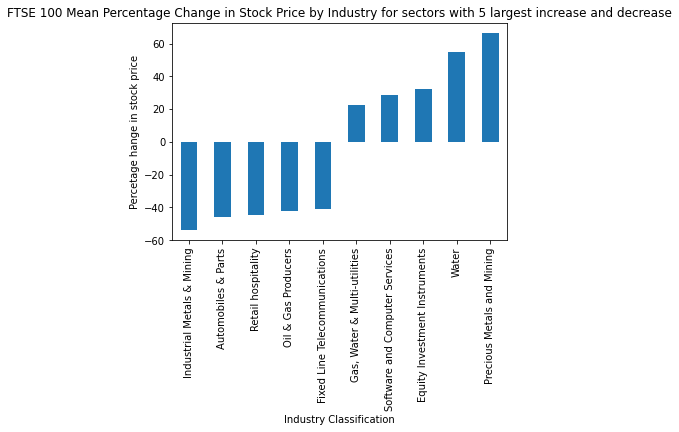

industryclassification
Industrial Metals & Mining       -53.991951
Automobiles & Parts              -45.908630
Retail hospitality               -44.453365
Oil & Gas Producers              -42.239573
Fixed Line Telecommunications    -40.719483
Gas, Water & Multi-utilities      22.678958
Software and Computer Services    28.340028
Equity Investment Instruments     32.031755
Water                             55.115205
Precious Metals and Mining        66.622579
Name: percentchangeq2, dtype: float64

In [26]:
# Sort above data into ascending oreder, plotting obly the industries with the 5  increases and decreases
highestlowest2= smallest.append(largest.sort_values(ascending=True))
highestlowest2.plot(kind='bar').set_title('FTSE 100 Mean Percentage Change in Stock Price by Industry for sectors with 5 largest increase and decrease')
plt.ylabel('Percetage hange in stock price')
plt.xlabel('Industry Classification')
plt.show()
highestlowest2

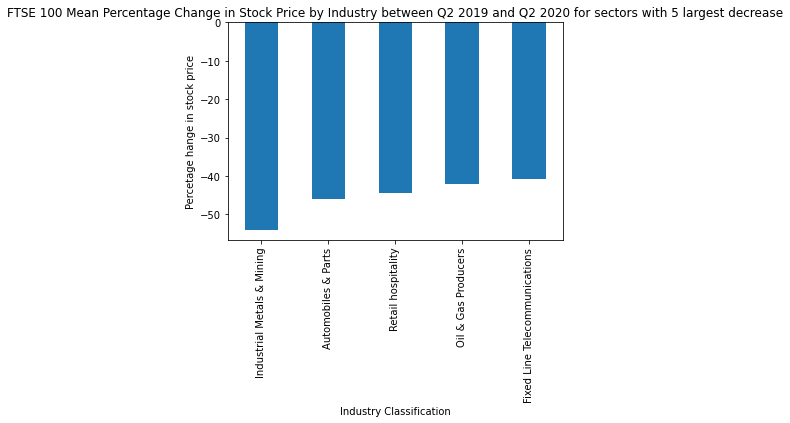

In [27]:
smallest.plot(kind='bar').set_title('FTSE 100 Mean Percentage Change in Stock Price by Industry between Q2 2019 and Q2 2020 for sectors with 5 largest decrease')
plt.ylabel('Percetage hange in stock price')
plt.xlabel('Industry Classification')
plt.show()

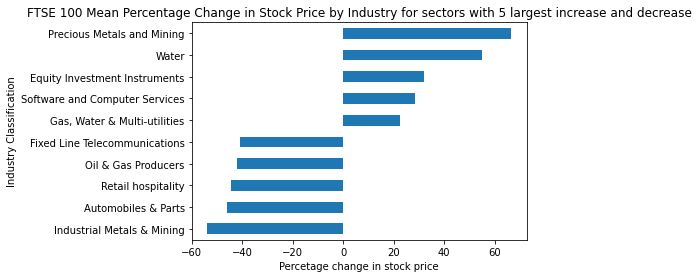

In [29]:
# Plot horizontally for ease of reading
highestlowest2.plot(kind='barh').set_title('FTSE 100 Mean Percentage Change in Stock Price by Industry for sectors with 5 largest increase and decrease')
plt.ylabel('Industry Classification')
plt.xlabel('Percetage change in stock price')
plt.show()

In [30]:
# Find the columns containng start and end date for change analysis
result2.columns.get_loc("02/01/2020")

1108

In [31]:
result2.columns.get_loc("03/08/2020")

1256

In [32]:
# Calculate the change in stock price between two specific dates during which ther pandemic affected demand and supply
result2['difference2020'] = result2["03/08/2020"] - result2["02/01/2020"]
result2

,ticker,13/08/2015,14/08/2015,17/08/2015,18/08/2015,19/08/2015,20/08/2015,21/08/2015,24/08/2015,25/08/2015,26/08/2015,27/08/2015,28/08/2015,01/09/2015,02/09/2015,03/09/2015,04/09/2015,07/09/2015,08/09/2015,09/09/2015,10/09/2015,11/09/2015,14/09/2015,15/09/2015,16/09/2015,17/09/2015,18/09/2015,21/09/2015,22/09/2015,23/09/2015,24/09/2015,25/09/2015,28/09/2015,29/09/2015,30/09/2015,01/10/2015,02/10/2015,05/10/2015,06/10/2015,07/10/2015,...,25/06/2020,26/06/2020,29/06/2020,30/06/2020,01/07/2020,02/07/2020,03/07/2020,06/07/2020,07/07/2020,08/07/2020,09/07/2020,10/07/2020,13/07/2020,14/07/2020,15/07/2020,16/07/2020,17/07/2020,20/07/2020,21/07/2020,22/07/2020,23/07/2020,24/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020,03/08/2020,04/08/2020,05/08/2020,06/08/2020,07/08/2020,10/08/2020,11/08/2020,industryclassification,meanq22019,meanq22020,changemeanq2,percentchangeq2,difference2020
0,III,465.132538,467.772888,464.252441,463.372375,449.290772,441.809937,428.784485,414.438873,432.480835,421.919708,436.529297,432.832886,404.141663,416.023010,424.735962,415.670990,416.551086,423.503845,427.552307,421.567627,417.871185,413.206696,419.279388,421.303619,417.519196,410.830444,414.790833,406.869995,417.079132,412.766693,424.647980,414.702881,402.205444,410.390350,411.358460,415.142944,428.432373,433.536957,430.104645,...,816.799988,823.400024,845.599976,832.599976,831.200012,846.400024,833.400024,863.400024,841.400024,821.400024,815.799988,825.200012,844.200012,831.200012,874.000000,867.000000,862.799988,865.0,870.000000,871.000000,867.000000,870.000000,870.000000,869.799988,884.200012,868.400024,889.599976,911.599976,903.400024,925.799988,918.200012,925.400024,917.000000,934.599976,Financial Services,1007.425964,765.944366,-241.481598,-23.970158,-182.508667
1,ADM,1282.060059,1267.971558,1295.268066,1290.865479,1340.175659,1397.410400,1374.516479,1325.206299,1362.189087,1326.086670,1357.786133,1364.830688,1334.892334,1356.025391,1372.755371,1363.949951,1365.711182,1394.768677,1421.184814,1377.446655,1372.079956,1368.501953,1373.868652,1376.552002,1366.713135,1358.662964,1364.924072,1319.307495,1341.668701,1321.990845,1347.929688,1319.307495,1301.418457,1343.457520,1338.985474,1335.407471,1349.718628,1358.662964,1347.035400,...,2304.000000,2313.000000,2300.000000,2299.000000,2293.000000,2321.000000,2278.000000,2285.000000,2265.000000,2259.000000,2240.000000,2286.000000,2286.000000,2333.000000,2349.000000,2376.000000,2363.000000,NaN,2338.000000,2374.000000,2372.000000,2346.000000,2362.000000,2369.000000,2403.000000,2395.000000,2400.000000,2459.000000,2471.000000,2492.000000,2485.000000,2520.000000,2536.000000,2525.000000,Nonlife Insurance,2109.170410,2247.779419,138.609009,6.571731,208.675781
2,AAL,649.455261,642.577637,641.219238,629.926514,602.331726,628.737854,622.200012,560.557312,580.510620,564.038574,616.680969,629.162415,581.104858,580.595398,615.577209,567.604614,575.416199,597.661865,630.775635,608.784668,609.973450,608.699646,624.237793,636.209656,624.407654,611.331848,590.020142,550.283630,558.774353,530.330444,521.924683,469.282135,461.130981,467.753845,471.234985,470.046295,492.037262,513.009277,564.208313,...,1815.291138,1813.122803,1838.157227,1842.493896,1798.535889,1845.647827,1808.588989,1833.426270,1815.291138,1847.027710,1857.475098,1897.293701,1939.871826,1939.083374,1925.284912,1902.812988,1931.001343,NaN,1921.145264,1911.683472,1934.352417,1928.438843,1956.233032,1956.430054,1945.391357,1856.489502,1843.282349,1883.100830,1853.138428,1939.477661,1901.827393,1860.629150,1876.201660,1896.505127,Mining,2028.645996,1569.283630,-459.362366,-22.643791,-233.567383
3,ANTO,503.366699,500.728882,504.245911,493.694977,485.342194,502.487366,495.013824,468.636597,509.521271,493.694977,537.657227,535.458984,505.125122,507.762756,524.468506,496.332703,533.700562,536.338196,540.734436,531.502441,534.140137,520.951477,532.381592,531.502441,520.064392,511.242218,498.891296,462.720612,462.720612,451.251801,446.399628,424.344

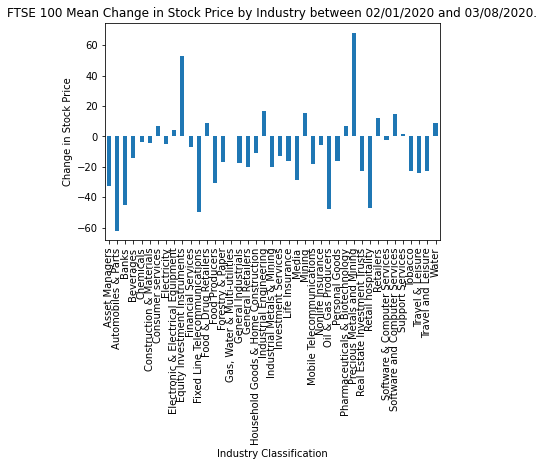

In [38]:
# Look at the mean difference in stock price beetween the two dates, by industry and as a percentage change
result2['difference2020percent'] = (result2['difference2020']*100)/ (result2['02/01/2020'])
result2
result2.groupby('industryclassification')['difference2020percent'].mean().plot(kind='bar').set_title('FTSE 100 Mean Change in Stock Price by Industry between 02/01/2020 and 03/08/2020.')
plt.ylabel('Change in Stock Price')
plt.xlabel('Industry Classification')
plt.show()

In [39]:
# Find the industries with the largest percentage increase in stock price between the start and end date chosen
industrydifpercentchange = result2.groupby('industryclassification')['difference2020percent'].mean()
largestdif= industrydifpercentchange.nlargest(n=5, keep='first')
largestdif 

industryclassification
Precious Metals and Mining        68.063952
Equity Investment Instruments     52.938257
Industrial Engineering            16.686451
Mining                            15.157240
Software and Computer Services    14.930810
Name: difference2020percent, dtype: float64

In [40]:
# Find the industries with the largest percentage decrease in stock price between the start and end date chosen
smallestdif = industrydifpercentchange.nsmallest(n=5, keep='first')
smallestdif.sort_values(ascending=False)

industryclassification
Banks                           -45.012294
Retail hospitality              -47.221648
Oil & Gas Producers             -47.870737
Fixed Line Telecommunications   -50.005102
Automobiles & Parts             -61.931180
Name: difference2020percent, dtype: float64

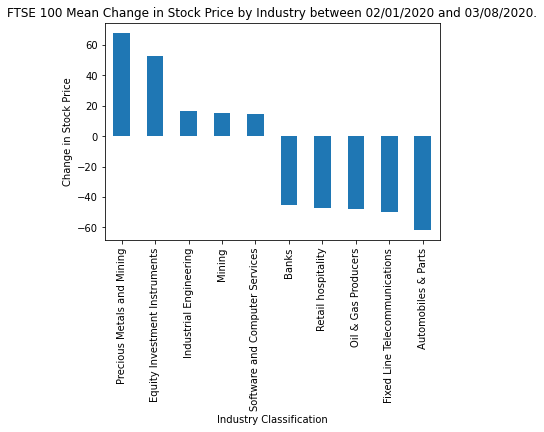

In [44]:
# Sort the values in descending orderand plot the percentage changes in stock price between the start and end date
highestlowest2dif= largestdif.append(smallestdif.sort_values(ascending=False))
highestlowest2dif.plot(kind='bar').set_title('FTSE 100 Mean Change in Stock Price by Industry between 02/01/2020 and 03/08/2020.')
plt.ylabel('Change in Stock Price')
plt.xlabel('Industry Classification')
plt.show()

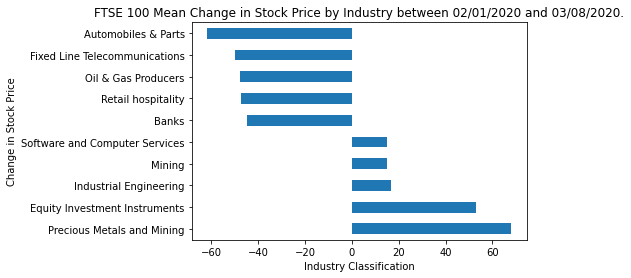

In [45]:
# Display horizontally for easy reading
highestlowest2dif.plot(kind='barh').set_title('FTSE 100 Mean Change in Stock Price by Industry between 02/01/2020 and 03/08/2020.')
plt.ylabel('Change in Stock Price')
plt.xlabel('Industry Classification')
plt.show()

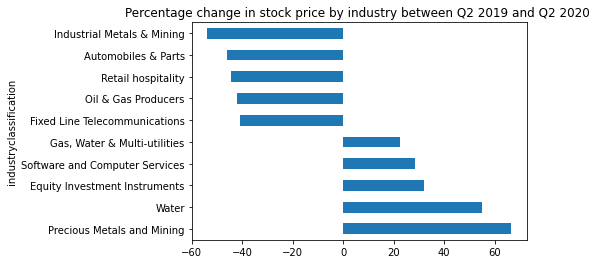

In [ ]:
highestlowest2.plot(kind='barh').set_title('Percentage change in stock price by industry between Q2 2019 and Q2 2020 ')
plt.show()

Text(0.5, 0, 'Percentage change in stock price')

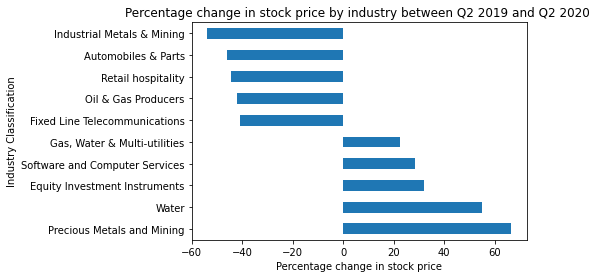

In [ ]:
# Add axes labels and title to form key result 1: percentage changes by industry betwen Q2 2019 and Q2 2020
highestlowest2.plot(kind='barh').set_title('Percentage change in stock price by industry between Q2 2019 and Q2 2020 ')
plt.ylabel('Industry Classification')
plt.xlabel('Percentage change in stock price')

Text(0.5, 0, 'Percentage change in stock price')

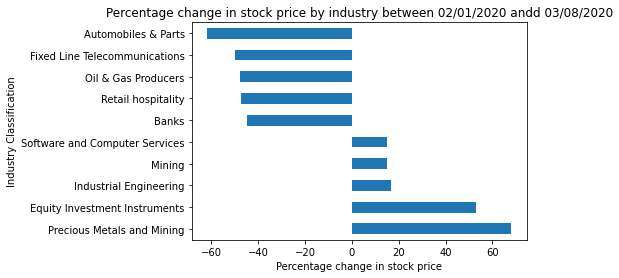

In [ ]:
# Key result 2: percentage changes by industry betwen 02/01/2020 and 03/08/2020
highestlowest2dif.plot(kind='barh').set_title('Percentage change in stock price by industry between 02/01/2020 andd 03/08/2020')
plt.ylabel('Industry Classification')
plt.xlabel('Percentage change in stock price')
# Reassuringly, this graph is broadly similar to the one above, lending confidence to the assertion that the relative indusrty analysis is robust to looking at the impact of the pandemic on a 1 year or 7 month horizon. 

#### __Conclusion:__

Figure 1 shows the change in the share price of FTSE100 firms between Q22019 and Q2 2020. The industries that experienced the largest falls in stock price include, automobiles, retail hospitality, oil and gas, and fixed line telecommunications.This result is robust to analysing the stock price change over a shorter timeframe too (specifically between 02/01/2020 and 03/08/2020). 

At the other end of the spectrum some industries have outperformed the market, including software and computer manuufacturers, precious metals and mining, and equity investment instruments. By contrast, FTSE 100 bank stocks performed poorly. 

Changes in stock prices may reflect: changes in final or intermediate demand, or restrictions in supply. In this way, the prices outlines above are largely unsurprising.

Whilst COVID was by far the biggest shock during the time frame studies, other factors may also have affected share prices over this period (industry fixed effects). Further limitations of this evidence are that stock price data does not include small firms or firms which are not publicly listed, or in the third/ public sector. Finally, FTSE 100 firms operate internationally,  so fluctuates in their share prices will represent the effects not only on the UK economy but also in other markets.

Overall, the sector level analysis hints at the following key results which we were then able to explore in more disaggregated approaches:
- the automobile industry suffered significantly due to COVID-19, perhaps because people reduced their use of cars, and delayed purchasing new car.
- software and computer science companies may have experienced increased demand for their service
- retail and hospitality sectors saw huge falls in demand during the crisis, as people reduced their number of holidays and restrictions prevented them from operning. 

---

After looking how different  sectors of the economy were affected, we decided to dive more deeply into the types of companies that did well during the pandemic, and whether this was influenced by their environmental, social and ethical sustainability policies.

---

### 2.b) The rise of ESG firms

#### __Introduction__

As people have grown more environmentally and socially conscious, there has been an increase in demand from the general public for firms to be more transparent in their ethical and environmental practices. The Environmental, Social and Governance (ESG) criteria allows this to occur by referring to three central factors that help measure the sustainability and societal impact of an investment in a company or business. This social criterion examines how the company manages its relationships with employees and supplies, governance relates to a company’s leadership, audits and shareholder rights; while more importantly the environmental criteria considers how a company performs in relation to the conservation of the natural world. 
Using this indicator, we can use the S&P Europe 350 ESG Index to measure the performance of ESG compliant firms as compared to the benchmark S&P Europe 350, from September 2019 to September 2020. 

#### __Description of data__
This dataset is taken directly from the Standard and Poor Dow Jones Indices website. It compares the stock price return on ESG firms compared to regular firms over the course of the year, which at the time of the data is September 2019 to September 2020.

Spglobal.com. (2020) S&P Europe 350 ESG Index - S&P Dow Jones Indices. [online] Available at: <https://www.spglobal.com/spdji/en/indices/equity/sp-europe-350-esg-index/#overview> [Accessed 16 September 2020]

#### __References:__

Lakhani, P., (2020) Why ESG Is Outperforming The S&P 500 - Openmarkets. [online] OpenMarkets. Available at: <https://openmarkets.cmegroup.com/16235/why-esg-is-outperforming-the-sp-500> [Accessed 16 September 2020].

European Commission (2020) Recovery Plan For Europe. [online] Available at: <https://ec.europa.eu/info/live-work-travel-eu/health/coronavirus-response/recovery-plan-europe_en> [Accessed 16 September 2020].

Nlfm.co.uk (2020)  April News Round Up | North Laine Financial Management | Brighton. [online] Available at: <https://www.nlfm.co.uk/blog-post/april-news-round-2> [Accessed 17 September 2020].

#### __Preparing and exploring the data__

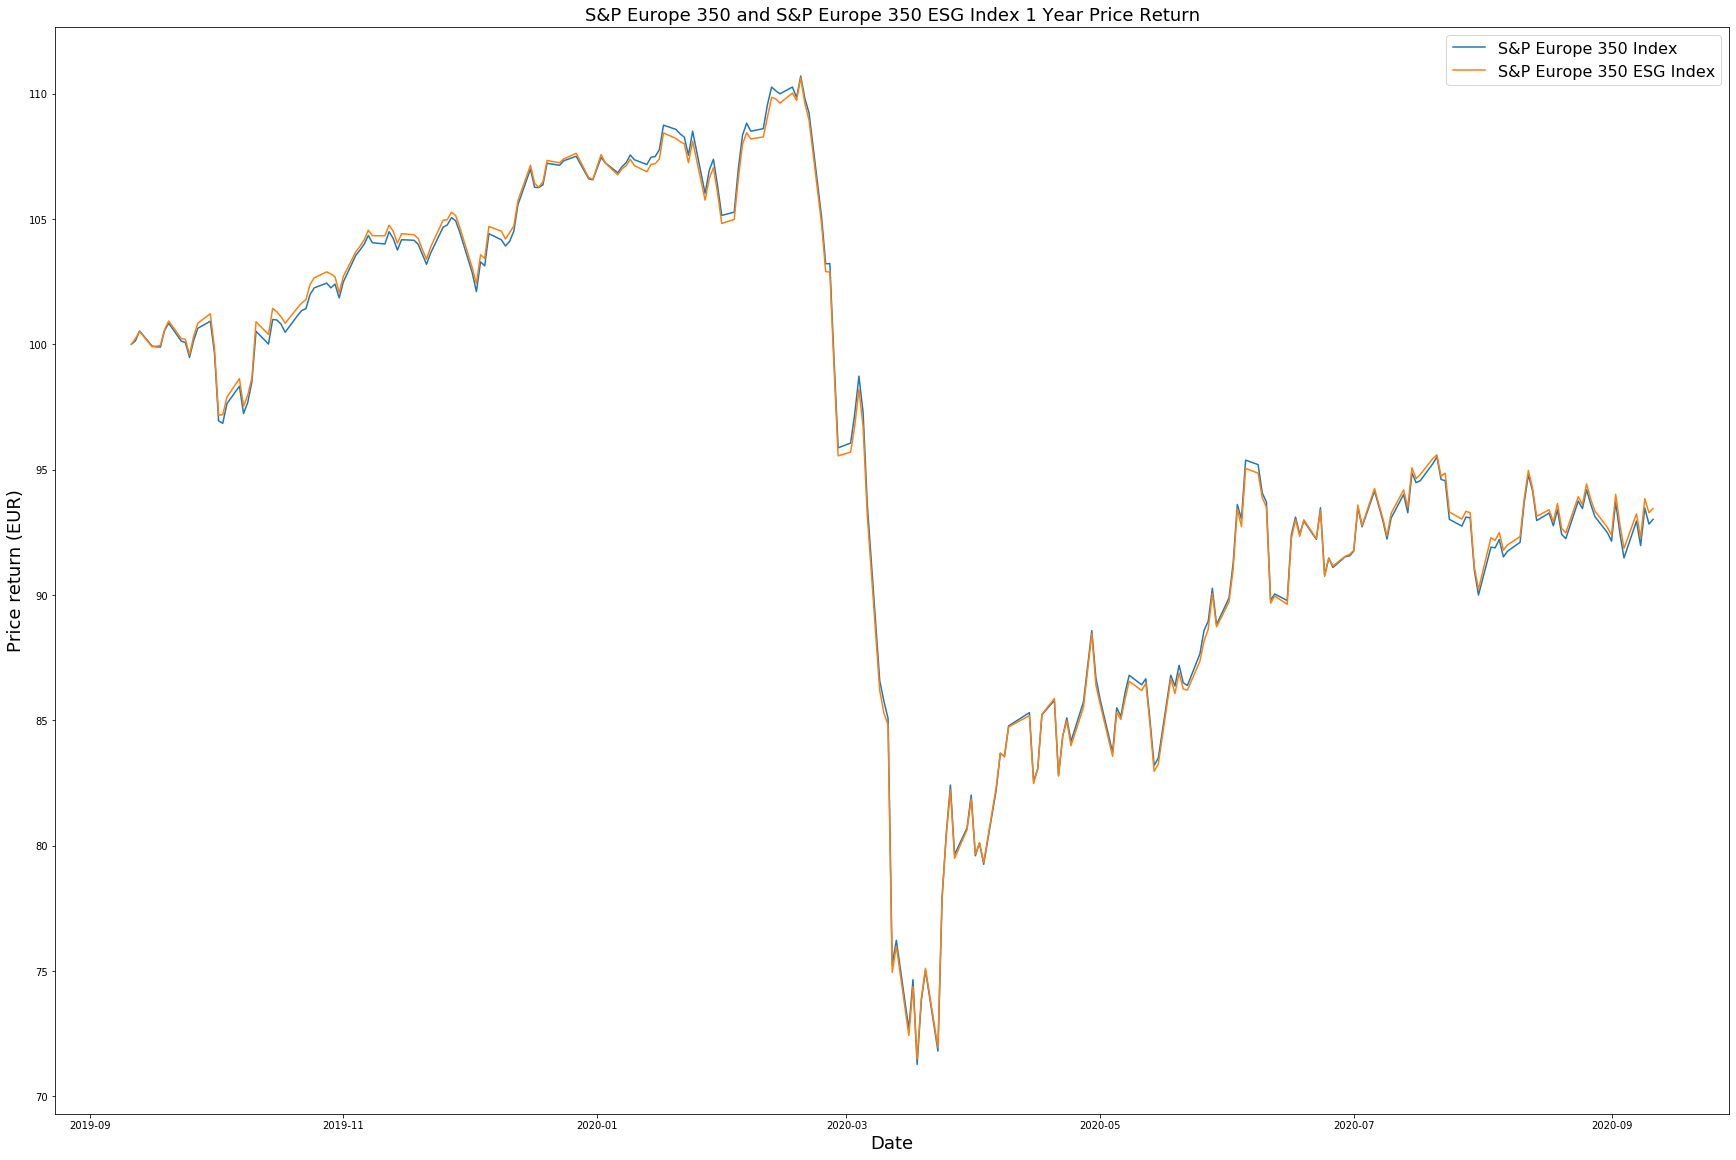

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
# Importing the csv file which has the stock price return of S&P and S&P ESG firms, removing any unneccessary characters
performance=pd.read_csv("PerformanceComparisonGraph s&p EU.csv",sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
# Turning the date into a date time format so python can recongise it as such
performance['Effective date']=pd.to_datetime(performance['Effective date'])

performance=performance.set_index('Effective date')
plt.figure(figsize=(30,20))
# Ploting the values of each stock price to the effective date
plt.plot(performance.index,performance.values)
plt.legend(['S&P Europe 350 Index','S&P Europe 350 ESG Index'], fontsize=16)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price return (EUR)", fontsize=18)
plt.title('S&P Europe 350 and S&P Europe 350 ESG Index 1 Year Price Return', fontsize=18)
plt.show()

#### __Key Findings__

As shown above, firms in the ESG index have slightly outperformed the bench mark S&P Europe 350 especially through this COVID period. 

Key reasons for this are that the commitment by ESG firms to improve their environmental standards mean that there is an active effort to reduce carbon footprint; investing in more sustainable and efficient energy resources such as solar power. Consequently, ESG funds typically have a low exposure to oil and gas, which gave them the edge when energy stocks suffered steep losses in April 2020 due to the oil crash.
Additionally, The European Commission's 750-billion-euro coronavirus recovery plan focuses on a 'green deal'. This will focus on promoting economic recovery while investing the commissions pledge to slash EU emissions to net zero by 2050 to tackle the threat of climate change.  

Although ESG firms’ better-quality governance was a contributing factor, their environmental initiatives which aligned with policies in the EU recovery plan and have allowed such firms to stabilise their stock prices, arguably had a larger impact on their performance. Hence allowing ESG firms to out-perform the benchmark while positively impacting the UK sustainability targets to mitigating climate change and use resources from nature more sustainably and efficiently.

---

### 2. b)  ESG Resiliance & The Impact of ESG Ratings on Tech Companies During the Pandemic 

#### __Introduction__ 

Consumer and investor habits have changed during the pandemic as shown by the previous sections. This had a knock-on effect on the stock market and some companies were more resilient than others. ESG has been growing in importance of the years and has been a megatrend for investors as seen by rising number of ESG reports by many sectors. Current research shows that ESG is no longer a fad but a longer trend in investing strategy.

The aim of this section is to understand how high and low ESG companies performed during the pandemic and if stock prices were determined by ESG ranking.  

#### __Description of the data__

The stock data table provided, and Yahoo Finance was used for this section. The top 5 and worst 5 ESG companies were selected based on their ranking in the responsibility index. Technology companies were selected to further analyse the impact ESG rankings have on tech stock price. The technology sector was one of the most resilient during the pandemic it would be interesting to find out if high ESG and low ESG tech companies experienced similar trends and if future trends look similar for both. Low and high ESG companies was determined through S&P 500 reports and Sustainalytics analysis. LSMT model code was used to predict stock price and was provided by user Fares Sayah from Kaggle. 


#### __References__:

Finance.yahoo.com. 2020. Yahoo Finance. [online] Available at: <https://finance.yahoo.com> [Accessed 17 September 2020].

Lakhani, P., 2020. Why ESG Is Outperforming The S&P 500 - Openmarkets. [online] OpenMarkets. Available at: <https://openmarkets.cmegroup.com/16235/why-esg-is-outperforming-the-sp-500> [Accessed 17 September 2020].

S&P 500 Dow Jones Indices, 2019. The S&P 500® ESG Index: Integrating Environmental, Social, And Governance Values Into The Core. [online] Available at: <https://www.spglobal.com/_media/documents/the-sp-500-esg-index-integrating-esg-values-into-the-core.pdf> [Accessed 17 September 2020].

Spglobal.com. 2020. S&P 500 ESG Index - S&P Dow Jones Indices. [online] Available at: <https://www.spglobal.com/spdji/en/indices/equity/sp-500-esg-index/#overview> [Accessed 17 September 2020].

Sustainalytics. 2020. Sustainalytics. [online] Available at: <https://www.sustainalytics.com> [Accessed 17 September 2020].

Tortoise. 2020. The Responsibility100 Index - Tortoise. [online] Available at: <https://www.tortoisemedia.com/intelligence/responsibility> [Accessed 17 September 2020].

Kaggle.com. 2020. Stock Market Analysis + Prediction Using LSTM. [online] Available at: <https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm> [Accessed 17 September 2020].

#### __Preparing and exploring the data__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime
import tensorflow as tf 
from tensorflow import keras 
#pip install sklearn

#### Quick FTSE Summary 

In [ ]:
s = pd.read_csv('/Users/maishachowdhury/Downloads/hackathon_stocks.csv')

In [ ]:
# Convert the date column to datetime64
s.Date = pd.to_datetime(s.Date)

In [ ]:
s.set_index('Date', inplace=True)

In [ ]:
best_worst = s[['ULVR', 'SMT']]

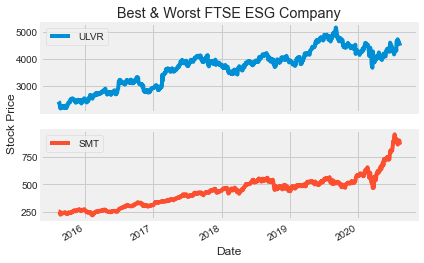

In [ ]:
# Plot data
best_worst.plot(subplots=True)
plt.title('Best & Worst FTSE ESG Company', y=2.20)
plt.xlabel('Date')
plt.ylabel('Stock Price', y=1.08)
plt.show()

Unilever (Retail and Consumer) has the highest ESG rating according to the responsibility index and Scottish Mortgage Trust (Finance) has the worst. Interestingly both companies did well during the pandemic. Research shows that the reseason SMT did very well even though it is a small invesment company with poor ESG rating is becuase they invested in tech companies that outperformed during the pandemic which helped boost their market price. 

In [ ]:
top_five = s[['ULVR', 'SVT', 'DGE', 'AZN', 'BT-A']]

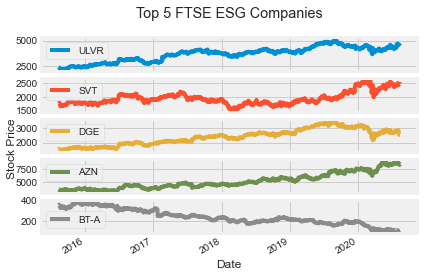

In [ ]:
# Plot data
top_five.plot(subplots=True)
plt.title('Top 5 FTSE ESG Companies', y=6.20)
plt.xlabel('Date')
plt.ylabel('Stock Price', y=2.50)
plt.show()

In [ ]:
worst_five = s[['SMT', 'DCC', 'EVR', 'ICP', 'MRO']]

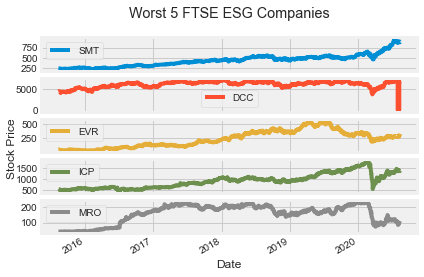

In [ ]:
# Plot data
worst_five.plot(subplots=True)
plt.title('Worst 5 FTSE ESG Companies', y=6.20)
plt.xlabel('Date')
plt.ylabel('Stock Price', y=2.50)
plt.show()

The two graphs above shows the top 5 ESG companies; Unilever (Retail and Consumer), Severn Trent (Engineering), Diageo (Retail and Consumer), AstraZeneca (Pharma) and BT group (Services). And the worst 5 ESG companies; Scottish Mortgage Investment Trust (Finance), DCC plc (Services), Evraz (Extraction), Intermediate Capital Holdings (Finance) and Melrose Industries (Finance) - According to the responsibility index. It is clear that high ESG companies were more resiliant during the pandemic whilst low ESG companies had steep declines during March 2020. It is noted that the top 5 and the worst 5 did not include any tech companies. Which we know did very well regardless of ESG ratings. As we come out of the pandemic the stock prices for top and worst companies have started to level off. Showing that more time and data is needed to determine if ESG investing and consumer support for ESG is a permenant trend. It is important to note that even though ESG companies were more resiliant e.g. less risk adverse it does not mean they offer higher returns than low ESG companies.  

#### Summary Statistics of 4 Tech Companies

Technology was one of the most resilient industries during the pandemic. It would be interesting to see if ESG rankings for tech companies make a difference to volatility and stock price. 

Technology companies were chosen to determine how much of an affect high ranking ESG companies achieved during the pandemic compared to low ranking ESG companies. 

Cisco and Intel are both high ranking ESG companies with low environmental risks.

Google and Amazon are both low ranking ESG companies with high environmental risks. In 2019 Google amongst others such as Facebook were dropped from the S&P 500 sustainability index. 

ESG ranking was determined through Sustainalytics and S&P reports. 

In [ ]:
# The tech stocks we'll use for this analysis


high_low_list = ['CSCO', 'INTC', 'GOOG', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in high_low_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [ ]:
company_list = [CSCO, INTC, GOOG, AMZN]
company_name = ['CSCO', 'INTC', 'GOOGLE', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-09-03,3488.409912,3303.000000,3485.000000,3368.000000,8161100.0,3368.000000,AMAZON
2020-09-04,3381.500000,3111.129883,3318.000000,3294.620117,8781800.0,3294.620117,AMAZON
2020-09-08,3250.850098,3130.000000,3144.000000,3149.840088,6094200.0,3149.840088,AMAZON
2020-09-09,3303.179932,3185.000000,3202.989990,3268.610107,5188700.0,3268.610107,AMAZON
2020-09-10,3349.889893,3170.550049,3307.219971,3175.110107,5330700.0,3175.110107,AMAZON
2020-09-11,3217.340088,3083.979980,3208.689941,3116.219971,5094000.0,3116.219971,AMAZON
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600.0,3102.969971,AMAZON
2020-09-15,3175.020020,3108.919922,3136.159912,3156.129883,4021500.0,3156.129883,AMAZON
2020-09-16,3187.239990,3074.149902,3179.989990,3078.100098,4512200.0,3078.100098,AMAZON


In [ ]:
CSCO.describe() # Summary Stats

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,45.333992,44.275929,44.829526,44.822055,2.418065e+07,44.205677
std,3.164538,3.583371,3.428160,3.369029,1.317639e+07,3.222971
min,35.820000,32.400002,33.230000,33.200001,7.044700e+06,32.631130
25%,42.660000,41.810001,42.139999,42.250000,1.644050e+07,42.180000
50%,46.459999,45.410000,46.040001,45.959999,2.006990e+07,45.262383
75%,47.700001,47.029999,47.279999,47.419998,2.674720e+07,46.660000
max,50.279999,49.400002,49.750000,49.930000,1.069283e+08,49.074467


#### Historical Closing Price of 2 High ESG Tech companies VS 2 Low ESG Tech Companies

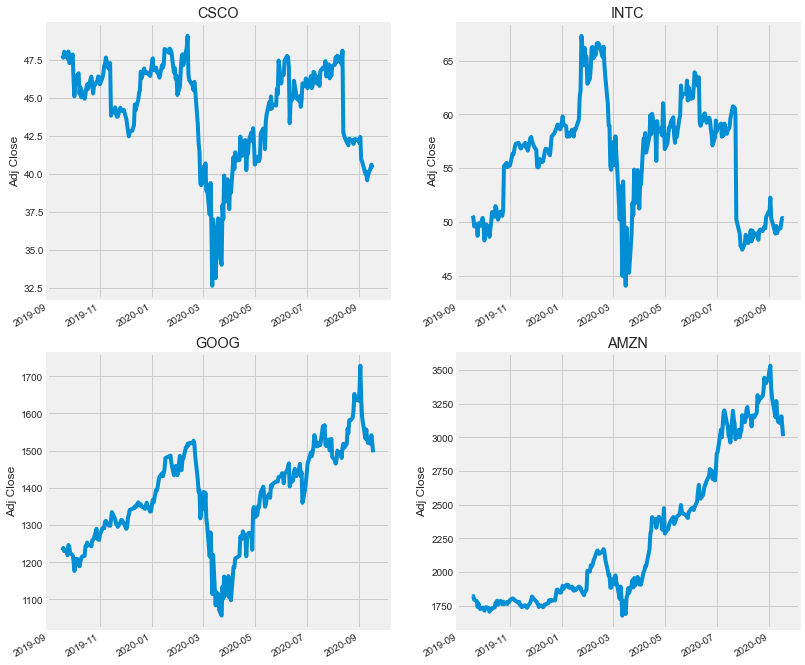

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{high_low_list[i - 1]}")

The closing price dropped considerably for all 4 companies in March 2020. As expected, the tech companies’ closing price started to increase few weeks after and remained high throughout the months. Interestingly, Amazon bounced back quickly this is due to governments policy e.g. lockdown and closing of businesses. Amazon took charge of the demand and increased in revenue over the months. Amazon has had many scandals of poor working conditions and excess packaging as well as many more. Amazon ranks low on ESG metrics and this graph indicates that the high environmental and sustainability risks associated were not enough to push consumers or investors away. It is also noted that Cisco and Intel both high ESG tech companies had a sudden dip at the end of August this could be due to policy relaxation and software no longer being in demand for example when countries went into lock down workplaces made adjustments and bought technology and software during the months of March-July therefore extra purchases may not have been needed.

#### Total Volume of Stock Traded Each Day for CISCO, INTEL, GOOGLE and AMAZON 

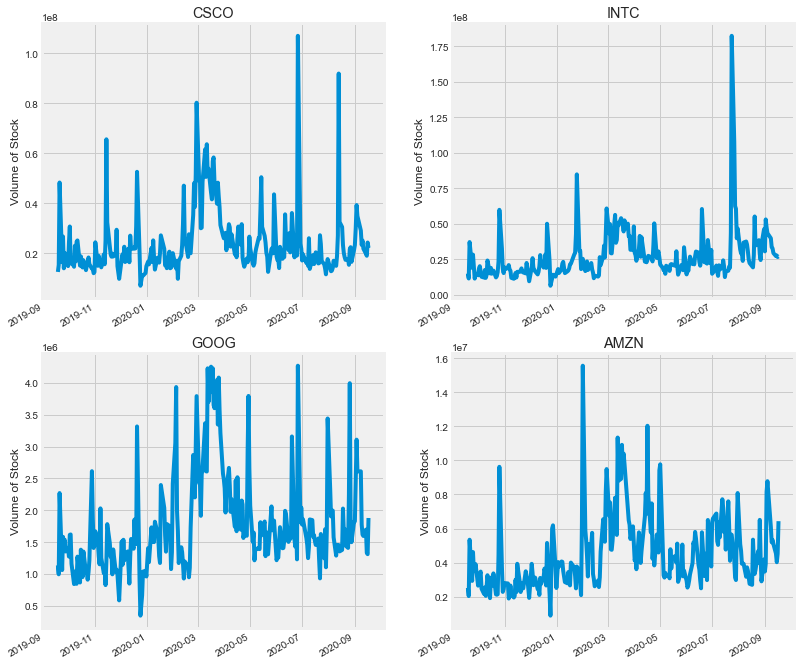

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume of Stock')
    plt.xlabel(None)
    plt.title(f"{high_low_list[i - 1]}")

Both the high ESG companies Cisco and Intel had higher volume of stock traded during the latter part of 2020 whilst the companies with low ESG ratings Google and Amazon had more sporadic highs during the year. This could possibly show that investors and consumers are moving towards more ESG friendly companies. Many financial services companies have released reports that ESG investing is no longer a fad but a larger trend. However, this does not mean that ESG companies have higher returns. 

#### What was the moving average of the various stocks?

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [ ]:
print(CSCO.columns)

#### Moving Averages for CISCO, INTEL, GOOGLE and AMAZON 

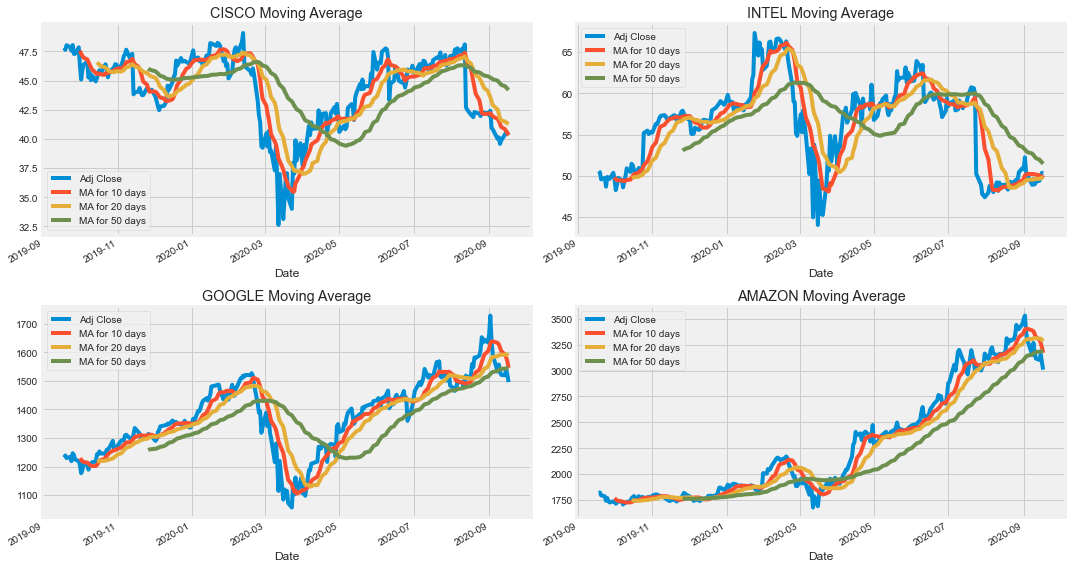

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

CSCO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('CISCO Moving Average')

INTC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('INTEL Moving Average')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GOOGLE Moving Average')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON Moving Average')

fig.tight_layout()

The moving averages have consistently moved with the adjusted close price. Moving averages for these companies during the period of September 2019 to September 2020 show to be a reliable indicator for showing upward and downward trends. However, the lower ESG companies Google and Amazon had moving averages closer to the blue line which is the adjusted close price which shows more confidence and less volatility. This could be due to other factors and not just ESG. Both Google and Amazon are major players in their specific industries and cover a large market share. Their services were heavily used by majority of people as there is less of a choice for Google and Amazon services and prices tend to be competitive compared to smaller companies with high ESG ratings. 

#### Predicting the closing price stock price of CISCO 

In [ ]:
#Get the stock quote
df = DataReader('CSCO', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,18.860001,18.480000,18.549999,18.629999,41236600.0,14.382661
2012-01-04,19.000000,18.350000,18.440001,18.990000,52927700.0,14.660585
2012-01-05,19.000000,18.670000,18.930000,18.920000,37865300.0,14.606544
2012-01-06,19.000000,18.830000,18.950001,18.850000,27796900.0,14.552503
2012-01-09,19.100000,18.790001,18.870001,18.969999,37811500.0,14.645146
...,...,...,...,...,...,...
2020-09-11,40.049999,39.520000,39.770000,39.880001,21853000.0,39.880001
2020-09-14,40.639999,40.049999,40.220001,40.369999,19866700.0,40.369999
2020-09-15,40.840000,40.380001,40.509998,40.599998,19024100.0,40.599998


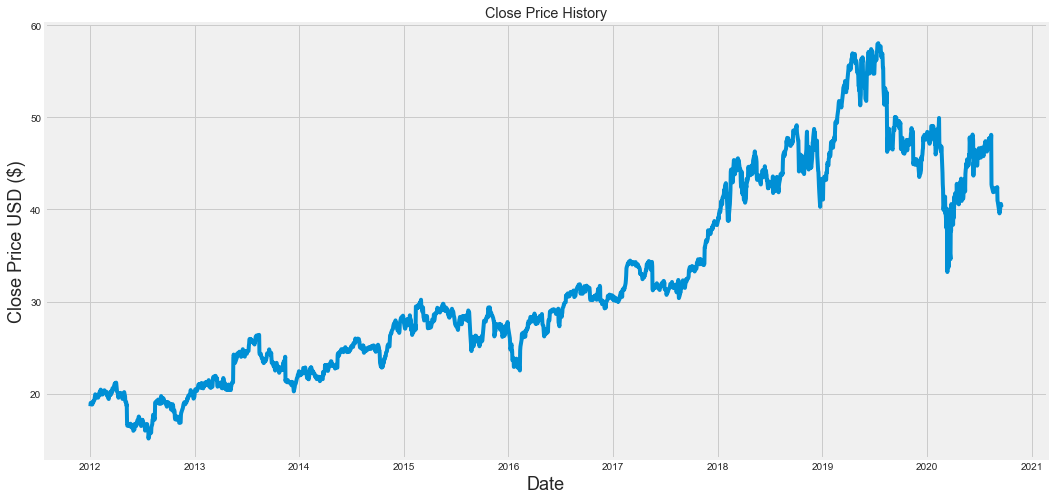

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History CISCO')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Steady trend of close price history unlike FTSE companies with low ESG companies. However, the top and worst FTSE companies were not technology companies 

#### LSMT Model for CISCO

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1694/1694 [==============================] - 261s 154ms/step - loss: 0.0012


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

# the data points vary by 1.59 points from the regression line 

1.580921659168895

#### Final CISCO Model 

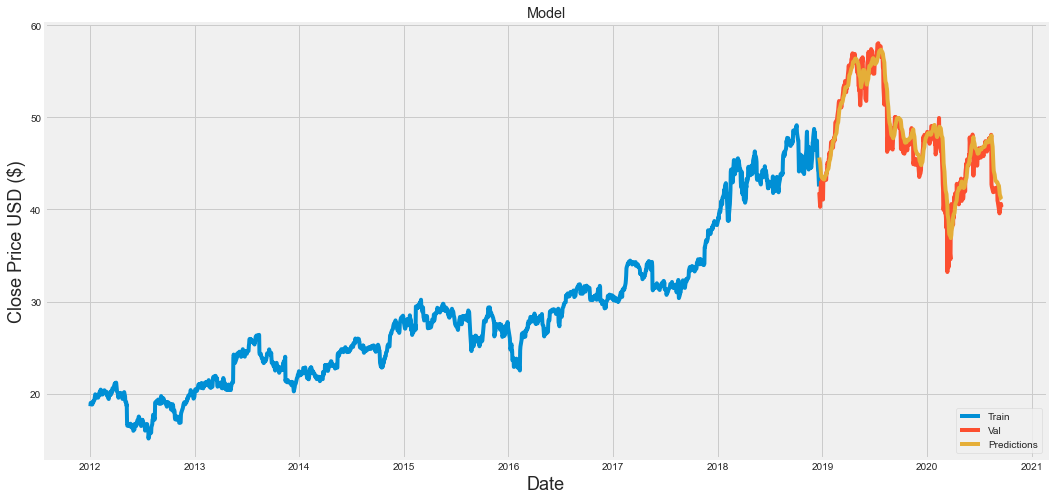

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#### Valid and Predicted Prices RMSE = 1.59 (CISCO)

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-12-21,41.849998,45.636856
2018-12-24,40.279999,45.007465
2018-12-26,42.470001,44.260315
2018-12-27,42.910000,43.798897
2018-12-28,42.770000,43.561073
...,...,...
2020-09-11,39.880001,41.610111
2020-09-14,40.369999,41.335995
2020-09-15,40.599998,41.175472


The model for Cisco (High ESG Tech) campany seems to be very strong with only a RMSE of 1.59

The predicted values are slighly over the test data. The model predicts that 2021 prices will start to level off but remain high. 

#### Predicting the closing price stock price of AMAZON 

In [ ]:
#Get the stock quote
df = DataReader('AMZN', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2020-09-11,3217.340088,3083.979980,3208.689941,3116.219971,5094000,3116.219971
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600,3102.969971
2020-09-15,3175.020020,3108.919922,3136.159912,3156.129883,4021500,3156.129883


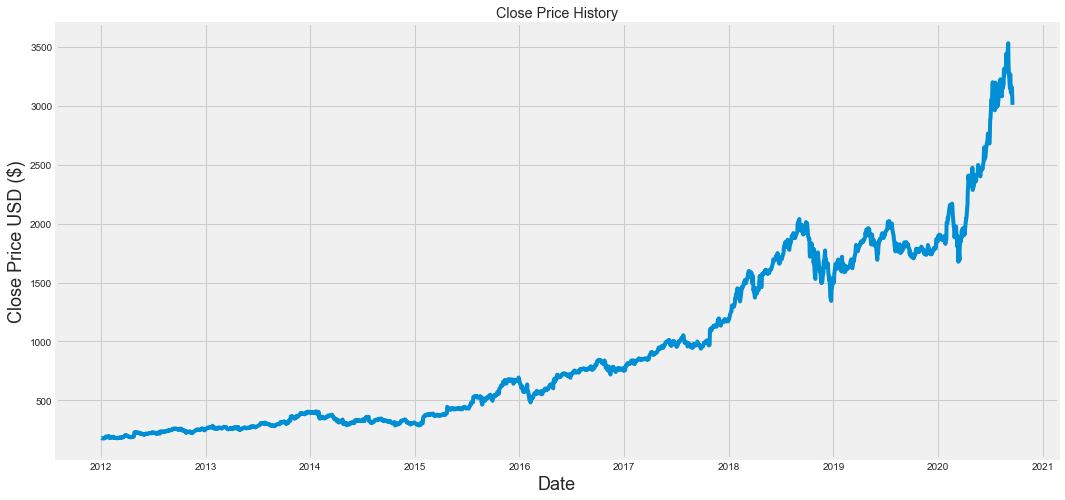

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Amazon is a much larger company than Cisco with a much higher stock price. The growth of the closing price has been consistent and in the middle of 2018 there was a big increase with a bigger incease in March 2020. Which highlights the dominance of the company. 

#### LSMT Model for AMAZON

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1694/1694 [==============================] - 301s 178ms/step - loss: 5.3764e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

166.61108814557065

#### Final AMAZON Model 

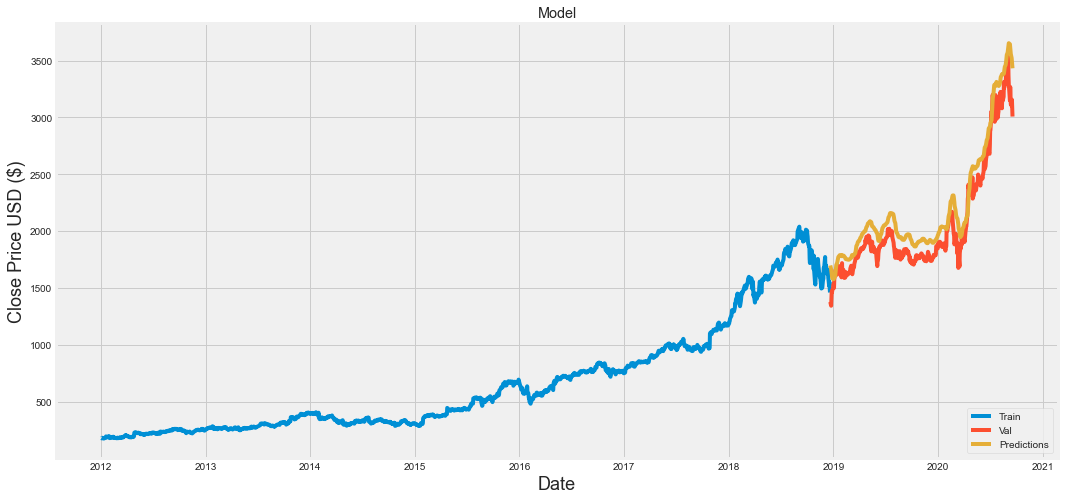

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#### Valid and Predicted Prices RMSE = 166.61 (AMAZON)

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-12-21,1377.449951,1698.242432
2018-12-24,1343.959961,1663.612427
2018-12-26,1470.900024,1624.641602
2018-12-27,1461.640015,1600.918823
2018-12-28,1478.020020,1585.685913
...,...,...
2020-09-11,3116.219971,3558.483398
2020-09-14,3102.969971,3522.757324
2020-09-15,3156.129883,3487.056152


Amazon has low ESG ratings and is a much larger company than Cisco which means comparing these two companies requries a more complex model and controlling of variables. 

The RMSE is 166.61 which is larger than Cico's but this is due to Amazon's high stock price. The model overall performs well. The prediction values is higher than the test data but starts to merge in March 2020. The model predicts that in 2021 the stock price will go down a little and remain high. 

#### Conclusion 

Limitations 
- It is difficult to predict stock price based on historical data
- Omitted variable bias and many Confounders
- Reverse Causality 
- Limited access to stock data API means it is more difficult to compare companies in similar size and industry 

ESG policies and values are pivatol to changing attitudes and consumer habits towards a more sustainable future. The result shows that ESG companies in the ftse 100 were more resiliant however, prices for top and worst companies are starting to level off also these graphs did not include tech companies. When we look at tech companies in the S&P 500 ESG ranking did not make a difference to stock price. Technology companies regardless of ESG ranking were more resiliant during the pandemic this could be due to market monopoly and stringent government policies which allowed tech companies to dominate changing habits during the pandemic. Overall, the result shows that technology companies are growing and stock price will remain high. This means that technology companies have more of a responsibility to become more sustainable and eviromentally friendly as more people rely on tech companies it is very important that ESG is taken seriously by tech companies and ESG regulations should be updated by the government to reflect changing consumer habits and to achieve UK sustainability targets. 

---

## Final Conclusion 

This report examined how individual and aggregate habits have changed and how this affects UK’s Sustainability targets. We have identified that for individuals’ lockdown restrictions caused public transport and road vehicle use to decline. This could contribute to improving air quality and stimulating engagement with the natural environment. For businesses and investors, a rise in ESG firms reflect these changes in consumer habits and further contribute to mitigating climate change and using resources more sustainably. ESG companies proved to be resilient during this pandemic with the exception of technology companies who outperformed regardless of ESG rating. However, although we have seen a sharp change in attitudes and habits in the short term, there is question to whether these changes are permanent or just a reflection of our current period. 